#              Machine Learning Approaches to Forecast Air Quality in Greater Manchester

## 1、Import Dataset 

In [29]:
import numpy as np 
import pandas as pd 

### 1.1 metadata

In [32]:
metadata = pd.read_csv('/Users/songyuanjie/Desktop/Manchester_GMs_metadata.csv')
metadata.head()

source  code                   site         site_type  latitude  longitude  \
0   aurn  MAN3  Manchester Piccadilly  Urban Background  53.48152  -2.237881   
1   aurn  MAN3  Manchester Piccadilly  Urban Background  53.48152  -2.237881   
2   aurn  MAN3  Manchester Piccadilly  Urban Background  53.48152  -2.237881   
3   aurn  MAN3  Manchester Piccadilly  Urban Background  53.48152  -2.237881   
4   aurn  MAN3  Manchester Piccadilly  Urban Background  53.48152  -2.237881   

  variable                       Parameter_name            start_date  \
0       O3                                Ozone  1995-12-18T00:00:00Z   
1       NO                         Nitric oxide  1995-12-18T00:00:00Z   
2      NO2                     Nitrogen dioxide  1995-12-18T00:00:00Z   
3      NOx  Nitrogen oxides as nitrogen dioxide  1995-12-18T00:00:00Z   
4      SO2                      Sulphur dioxide  1995-12-18T00:00:00Z   

  end_date           ratified_to                     zone  \
0  ongoing  2024-03-31T00:00:00Z  North West & Merseyside   
1  ongoing  2024-03-31T00:00:00Z  North West & Merseyside   
2  ongoing  2024-03-31T00:00:00Z  North West & Merseyside   
3  ongoing  2024-03-31T00:00:00Z  North West & Merseyside   
4  ongoing  2024-03-31T00:00:00Z  North West & Merseyside   

                   agglomeration local_authority  
0  Greater Manchester Urban Area      Manchester  
1  Greater Manchester Urban Area      Manchester  
2  Greater Manchester Urban Area      Manchester  
3  Greater Manchester Urban Area      Manchester  
4  Greater Manchester Urban Area      Manchester

In [ ]:
metadata.info

### 1.2 Dataset of Manchester

In [34]:
file_path_manchester_2018_2024 = '/Users/songyuanjie/Desktop/Manchester_GMs_2018_2024.csv'
data = pd.read_csv(file_path_manchester_2018_2024)
data.head()

source                 site  code                  date       nox       no2  \
0   aurn  Manchester Sharston  MAHG  2018-01-01T00:00:00Z  15.34736  13.01696   
1   aurn  Manchester Sharston  MAHG  2018-01-01T01:00:00Z  13.59893  10.03859   
2   aurn  Manchester Sharston  MAHG  2018-01-01T02:00:00Z  10.00492   7.43177   
3   aurn  Manchester Sharston  MAHG  2018-01-01T03:00:00Z   8.01365   6.46005   
4   aurn  Manchester Sharston  MAHG  2018-01-01T04:00:00Z  11.80193   8.69472   

        no        o3   ws     wd  air_temp  so2  pm2.5  v2.5  nv2.5  pm10  
0  1.51985  59.53838  5.2  233.4       3.2  NaN    NaN   NaN    NaN   NaN  
1  2.32199  61.46756  6.2  218.7       2.8  NaN    NaN   NaN    NaN   NaN  
2  1.67817  64.01208  6.5  218.8       2.8  NaN    NaN   NaN    NaN   NaN  
3  1.01323  66.35703  6.6  222.9       2.9  NaN    NaN   NaN    NaN   NaN  
4  2.02647  66.55660  6.6  223.9       2.9  NaN    NaN   NaN    NaN   NaN

In [36]:
unique_sites = data['site'].unique()
unique_sites

array(['Manchester Sharston', 'Manchester Piccadilly'], dtype=object)

### 1.3 Split the data of two  sites into two separate datasets

In [39]:
data_sharston = data[data['site'] == 'Manchester Sharston']
data_sharston.info

<bound method DataFrame.info of       source                 site  code                  date       nox  \
0       aurn  Manchester Sharston  MAHG  2018-01-01T00:00:00Z  15.34736   
1       aurn  Manchester Sharston  MAHG  2018-01-01T01:00:00Z  13.59893   
2       aurn  Manchester Sharston  MAHG  2018-01-01T02:00:00Z  10.00492   
3       aurn  Manchester Sharston  MAHG  2018-01-01T03:00:00Z   8.01365   
4       aurn  Manchester Sharston  MAHG  2018-01-01T04:00:00Z  11.80193   
...      ...                  ...   ...                   ...       ...   
56947   aurn  Manchester Sharston  MAHG  2024-06-30T19:00:00Z   8.03250   
56948   aurn  Manchester Sharston  MAHG  2024-06-30T20:00:00Z   4.97250   
56949   aurn  Manchester Sharston  MAHG  2024-06-30T21:00:00Z   8.79750   
56950   aurn  Manchester Sharston  MAHG  2024-06-30T22:00:00Z  10.32750   
56951   aurn  Manchester Sharston  MAHG  2024-06-30T23:00:00Z  22.95000   

            no2       no        o3   ws     wd  air_temp  so2  pm2.

In [41]:
data_piccadilly = data[data['site'] == 'Manchester Piccadilly']
data_piccadilly.info

<bound method DataFrame.info of        source                   site  code                  date       nox  \
56952    aurn  Manchester Piccadilly  MAN3  2018-01-01T00:00:00Z  44.61709   
56953    aurn  Manchester Piccadilly  MAN3  2018-01-01T01:00:00Z  29.69889   
56954    aurn  Manchester Piccadilly  MAN3  2018-01-01T02:00:00Z  20.36643   
56955    aurn  Manchester Piccadilly  MAN3  2018-01-01T03:00:00Z  25.62561   
56956    aurn  Manchester Piccadilly  MAN3  2018-01-01T04:00:00Z  24.80064   
...       ...                    ...   ...                   ...       ...   
113899   aurn  Manchester Piccadilly  MAN3  2024-06-30T19:00:00Z   9.94500   
113900   aurn  Manchester Piccadilly  MAN3  2024-06-30T20:00:00Z   9.75375   
113901   aurn  Manchester Piccadilly  MAN3  2024-06-30T21:00:00Z   8.03250   
113902   aurn  Manchester Piccadilly  MAN3  2024-06-30T22:00:00Z  10.71000   
113903   aurn  Manchester Piccadilly  MAN3  2024-06-30T23:00:00Z  12.24000   

             no2       no      

## 2、Data Preprocessing

### 2.1 check missing values

In [45]:
# Check for missing values in piccadilly
missing_values = data_piccadilly.isnull().sum()
missing_values

source          0
site            0
code            0
date            0
nox           928
no2           927
no            927
o3            657
ws           1248
wd           1248
air_temp     1248
so2          3483
pm2.5        5151
v2.5        40578
nv2.5       40578
pm10        21525
dtype: int64

In [47]:
# Check for missing values in sharston
missing_values = data_sharston.isnull().sum()
missing_values

source          0
site            0
code            0
date            0
nox           774
no2           775
no            775
o3            752
ws           1248
wd           1248
air_temp     1248
so2         56952
pm2.5       56952
v2.5        56952
nv2.5       56952
pm10        56952
dtype: int64

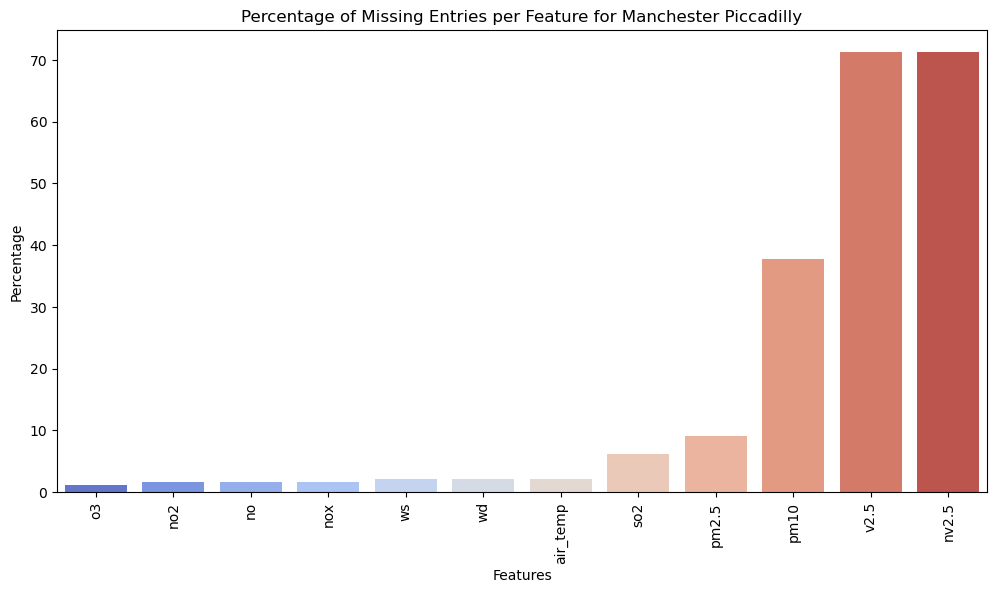

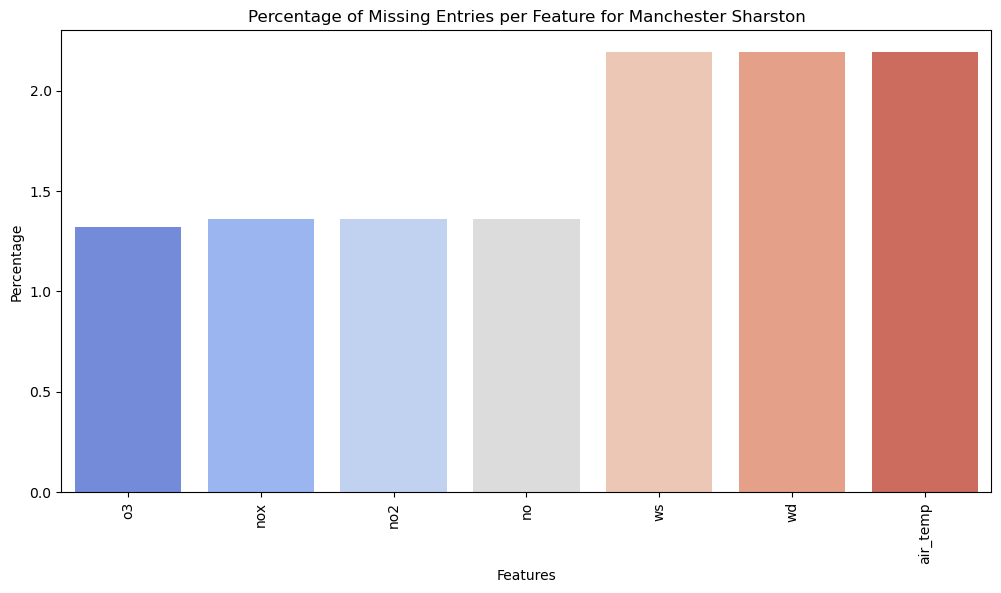

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the percentage of missing values in a vertical bar chart 
def plot_missing_data_vertical_colored(data, title, filter_columns=None):
    # If filter_columns is provided, only consider those columns
    if filter_columns:
        data = data[filter_columns]

    # Calculate percentage of missing data for each column
    missing_data = (data.isna().sum() / len(data)) * 100
    missing_data = missing_data[missing_data > 0].sort_values(ascending=True)

    # Generate a color palette with a more subdued color for each bar
    palette = sns.color_palette("coolwarm", len(missing_data))

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_data.index, y=missing_data.values, hue=missing_data.index, palette=palette, dodge=False)
    plt.title(f'Percentage of Missing Entries per Feature for {title}')
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.xticks(rotation=90)
    plt.show()
    
    return missing_data

# Example usage for Manchester Piccadilly
missing_piccadilly_vertical = plot_missing_data_vertical_colored(data_piccadilly, "Manchester Piccadilly")

# Example usage for Manchester Sharston with filtering for specific pollutants
pollutant_columns = ['o3', 'no2', 'no', 'nox', 'ws', 'wd', 'air_temp']
missing_sharston_vertical = plot_missing_data_vertical_colored(data_sharston, "Manchester Sharston", filter_columns=pollutant_columns)


### 2.2 Plot distribution of all variables

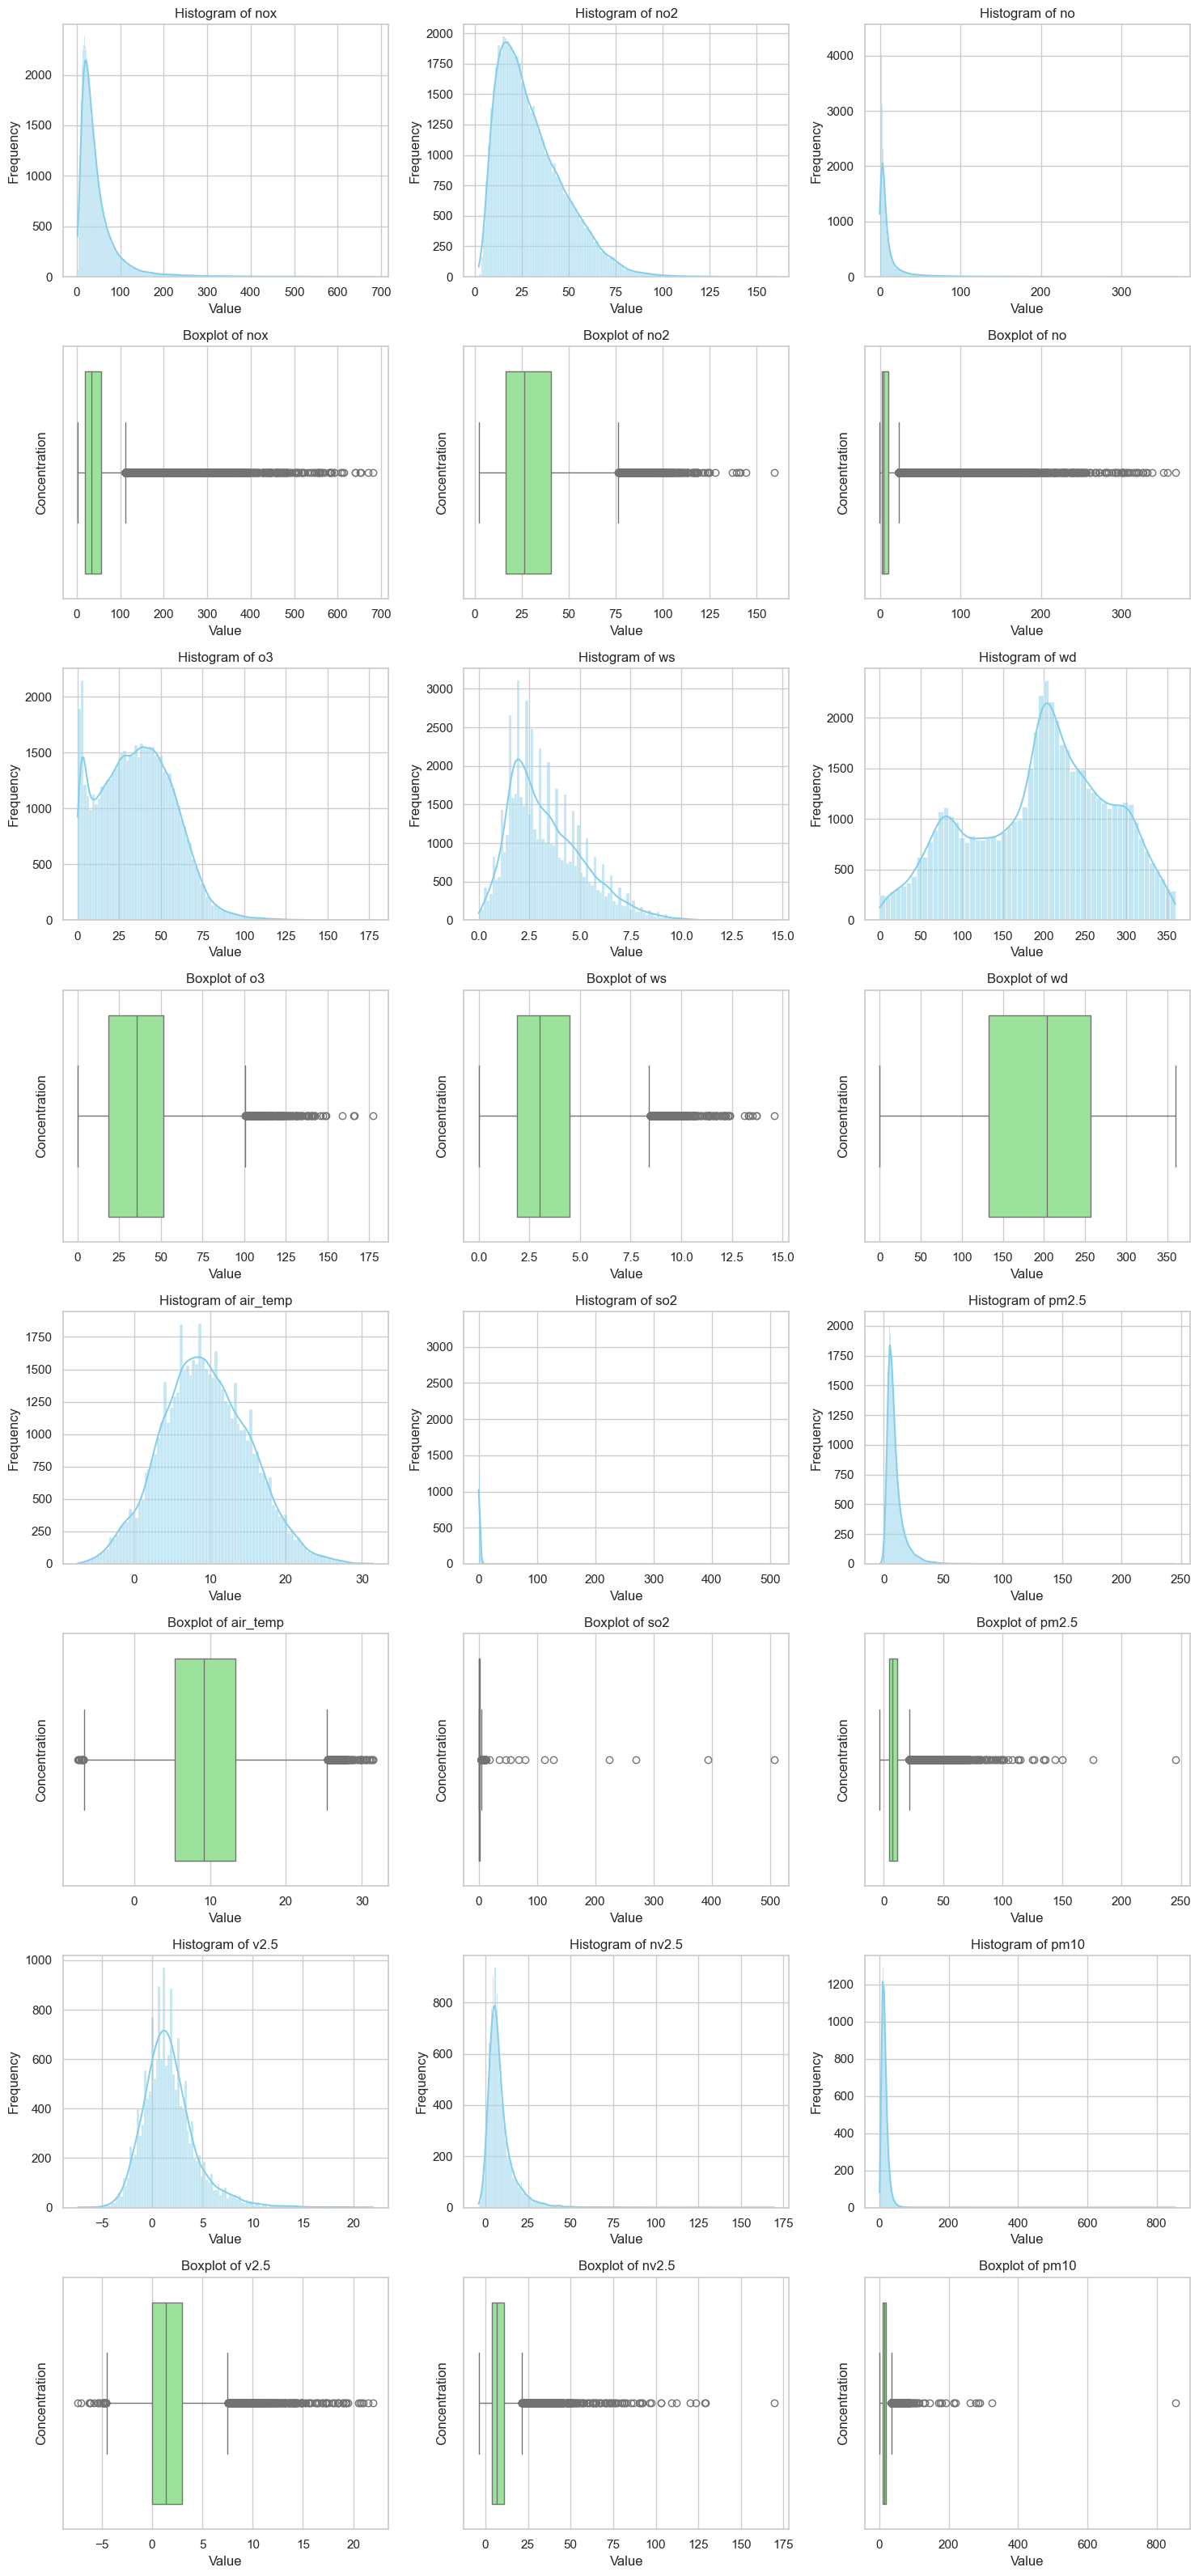

In [793]:
def plot_distributions(data, columns):
    # Calculate the number of rows needed for the plotting (3 columns per row)
    num_features = len(columns)
    num_rows = (num_features + 2) // 3  # Up to 3 features per row

    # Create a figure with a grid of subplots with slightly reduced height
    fig, axes = plt.subplots(num_rows * 2, 3, figsize=(15, 4 * num_rows * 2))  # Reduce vertical size factor

    # Loop through each feature to plot its distribution and boxplot
    for i, col in enumerate(columns):
        row = (i // 3) * 2
        col_pos = i % 3
        
        # Histogram in the upper part of the grid with a custom color
        ax_hist = axes[row, col_pos]
        sns.histplot(data[col].dropna(), kde=True, ax=ax_hist, color="skyblue")
        ax_hist.set_title(f'Histogram of {col}')
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')

        # Boxplot directly below the histogram with a different custom color
        ax_box = axes[row + 1, col_pos]
        sns.boxplot(x=data[col].dropna(), ax=ax_box, color="lightgreen")
        ax_box.set_title(f'Boxplot of {col}')
        ax_box.set_xlabel('Value')
        ax_box.set_ylabel('Concentration')

    # Hide any unused axes
    total_plots = num_features * 2
    for j in range(total_plots, axes.size):
        axes.flatten()[j].set_visible(False)

    plt.tight_layout()
    plt.show()

features = data_piccadilly.select_dtypes(include = ['float64','int64']).columns
plot_distributions(data_piccadilly, features)

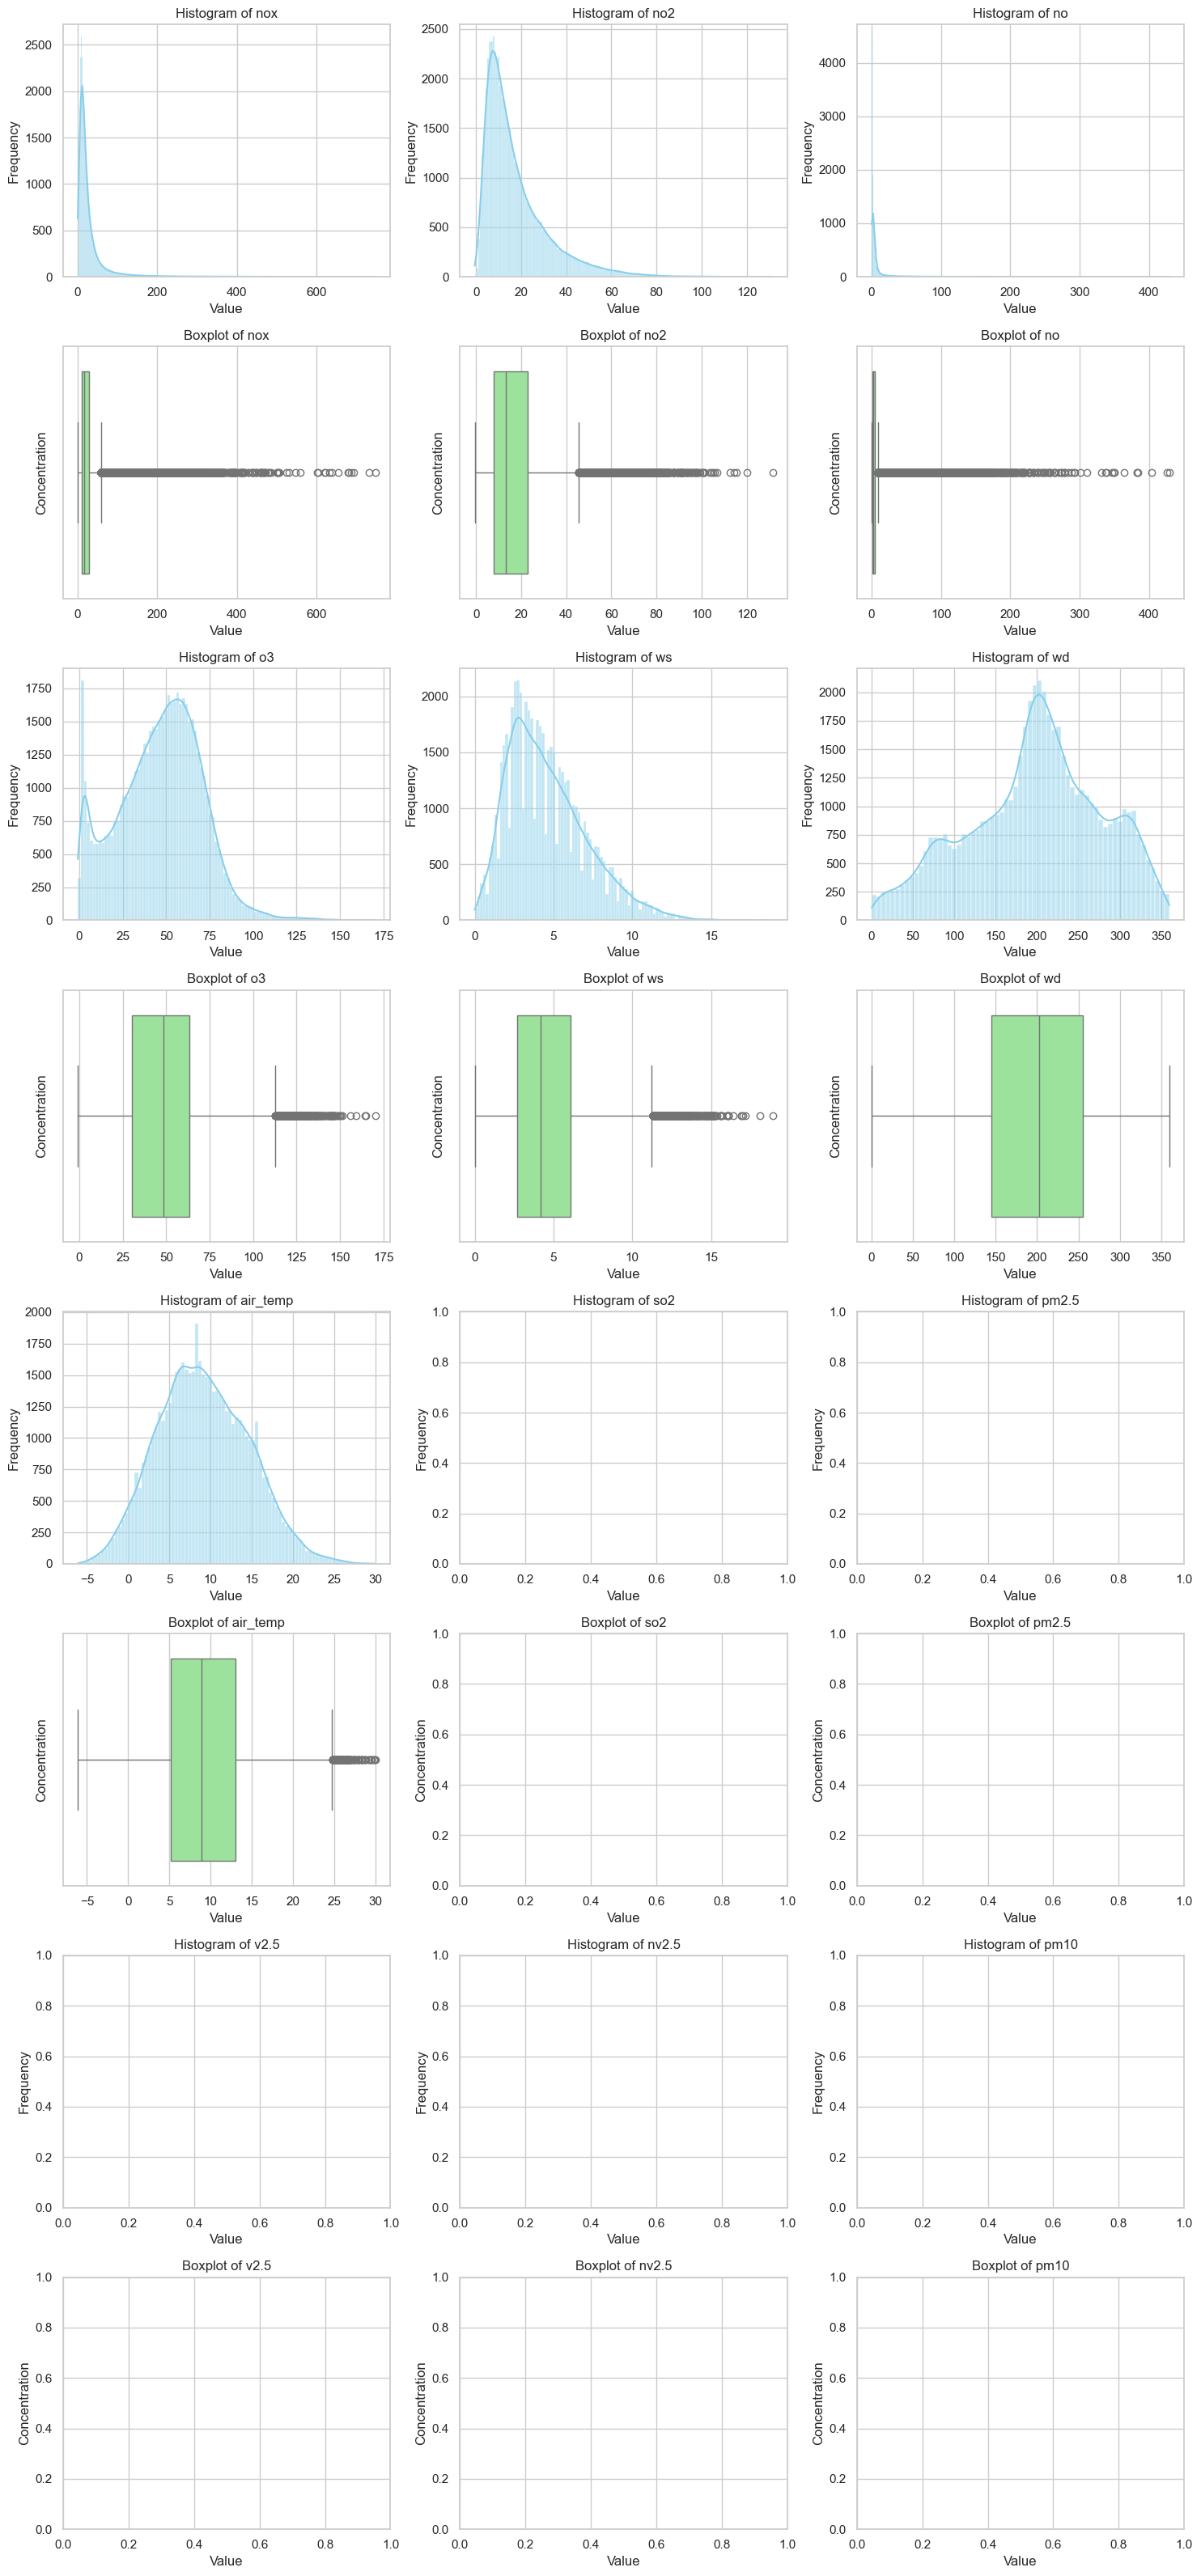

In [795]:
# Execute the adjusted plotting function for Manchester Sharston
features = data_sharston.select_dtypes(include = ['float64','int64']).columns

plot_distributions(data_sharston, features)

### 2.3 missing values over time for all features

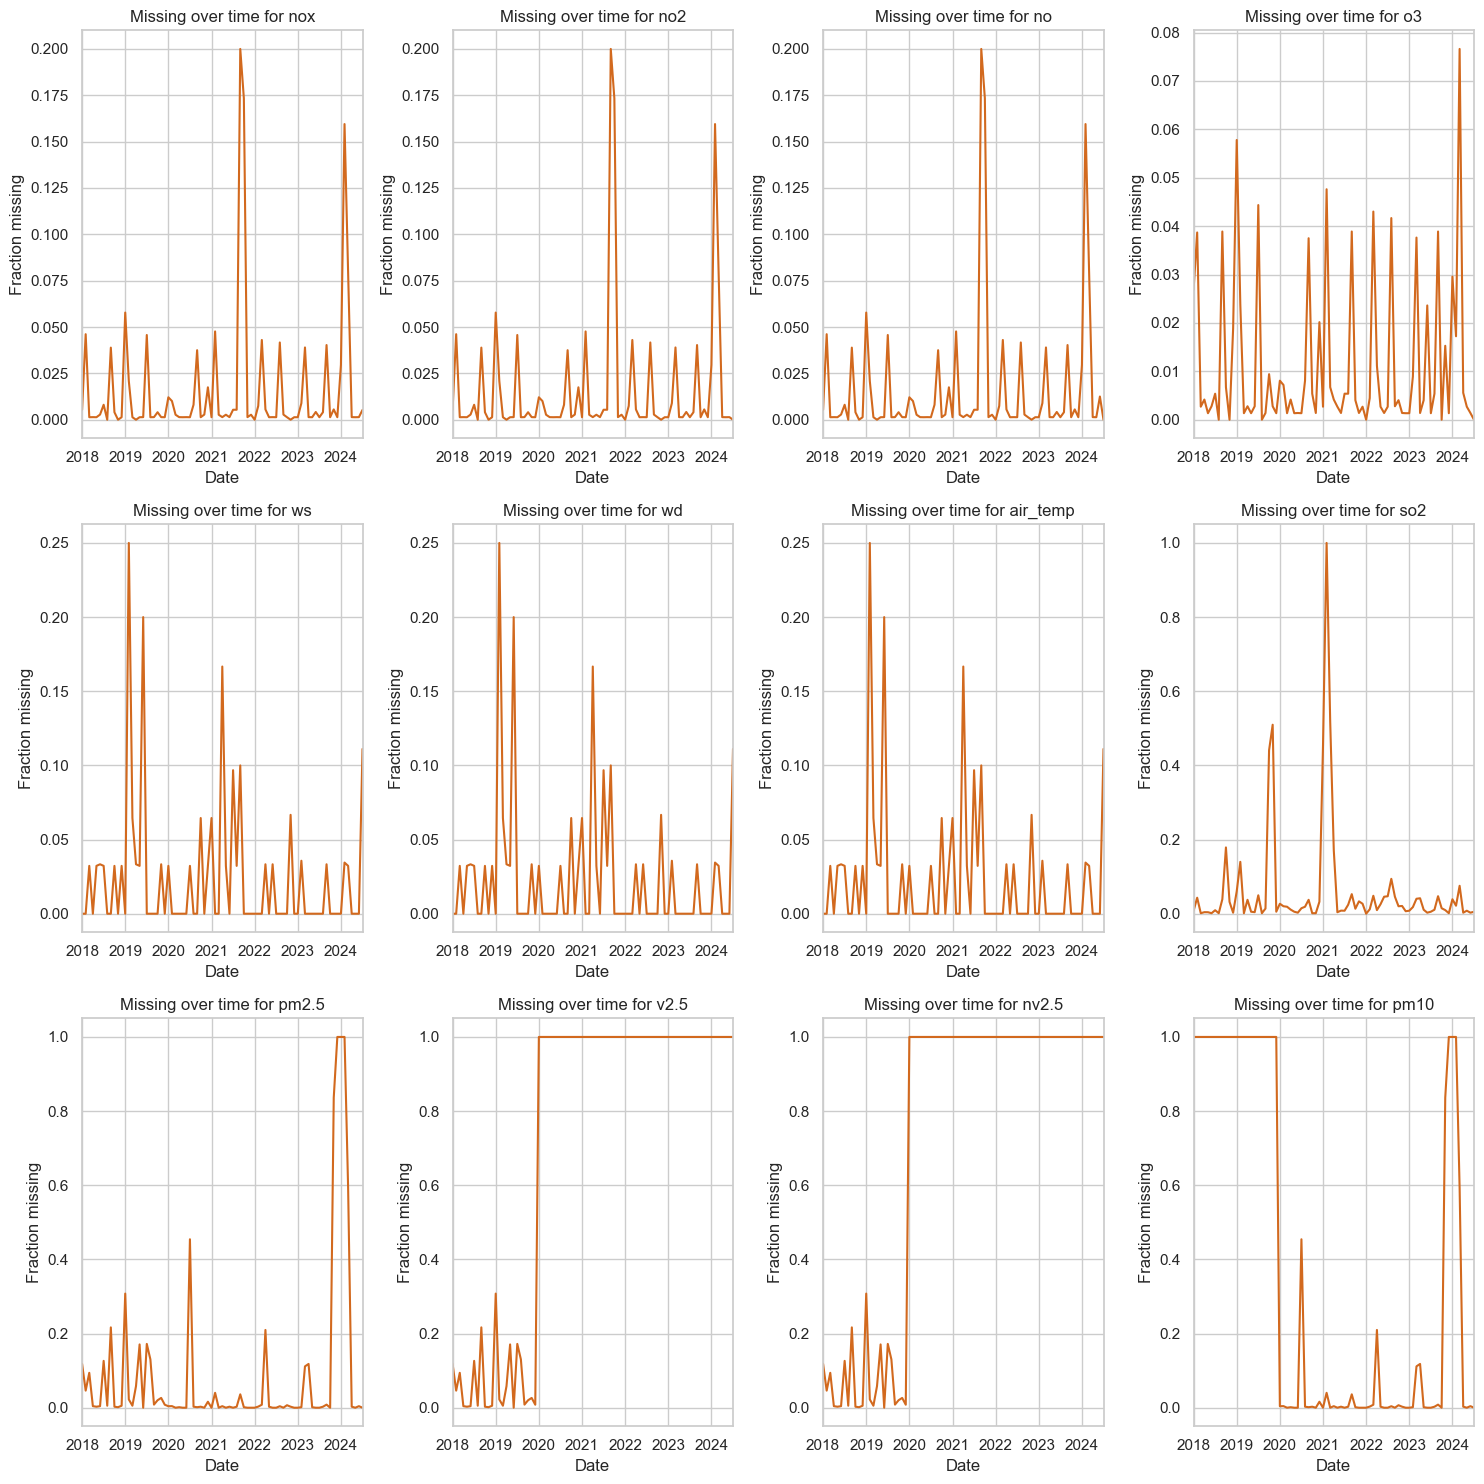

In [804]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning)

# Convert 'date' to datetime to facilitate time-based analysis, with error handling
#data_piccadilly['date'] = pd.to_datetime(data_piccadilly['date'], errors='coerce')

# Check if conversion was successful
if not pd.api.types.is_datetime64_any_dtype(data_piccadilly['date']):
    raise ValueError("The 'date' column could not be converted to datetime format.")

# Select features that are numeric
features = data_piccadilly.select_dtypes(include=['float64', 'int64']).columns

# Plotting missing values distribution over time for each feature
def plot_missing_values_over_time(data, features):
    num_features = len(features)
    num_cols = 4
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        missing_series = data[feature].isna()
        # Plot the proportion of missing values per month
        missing_series.groupby(data['date'].dt.to_period("M")).mean().plot(
            ax=axes[i], color='chocolate', title=f'Missing over time for {feature}'
        )
        axes[i].set_ylabel('Fraction missing')
        axes[i].set_xlabel('Date')

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Execute the function to visualize missing values over time for Piccadilly's features
plot_missing_values_over_time(data_piccadilly, features)


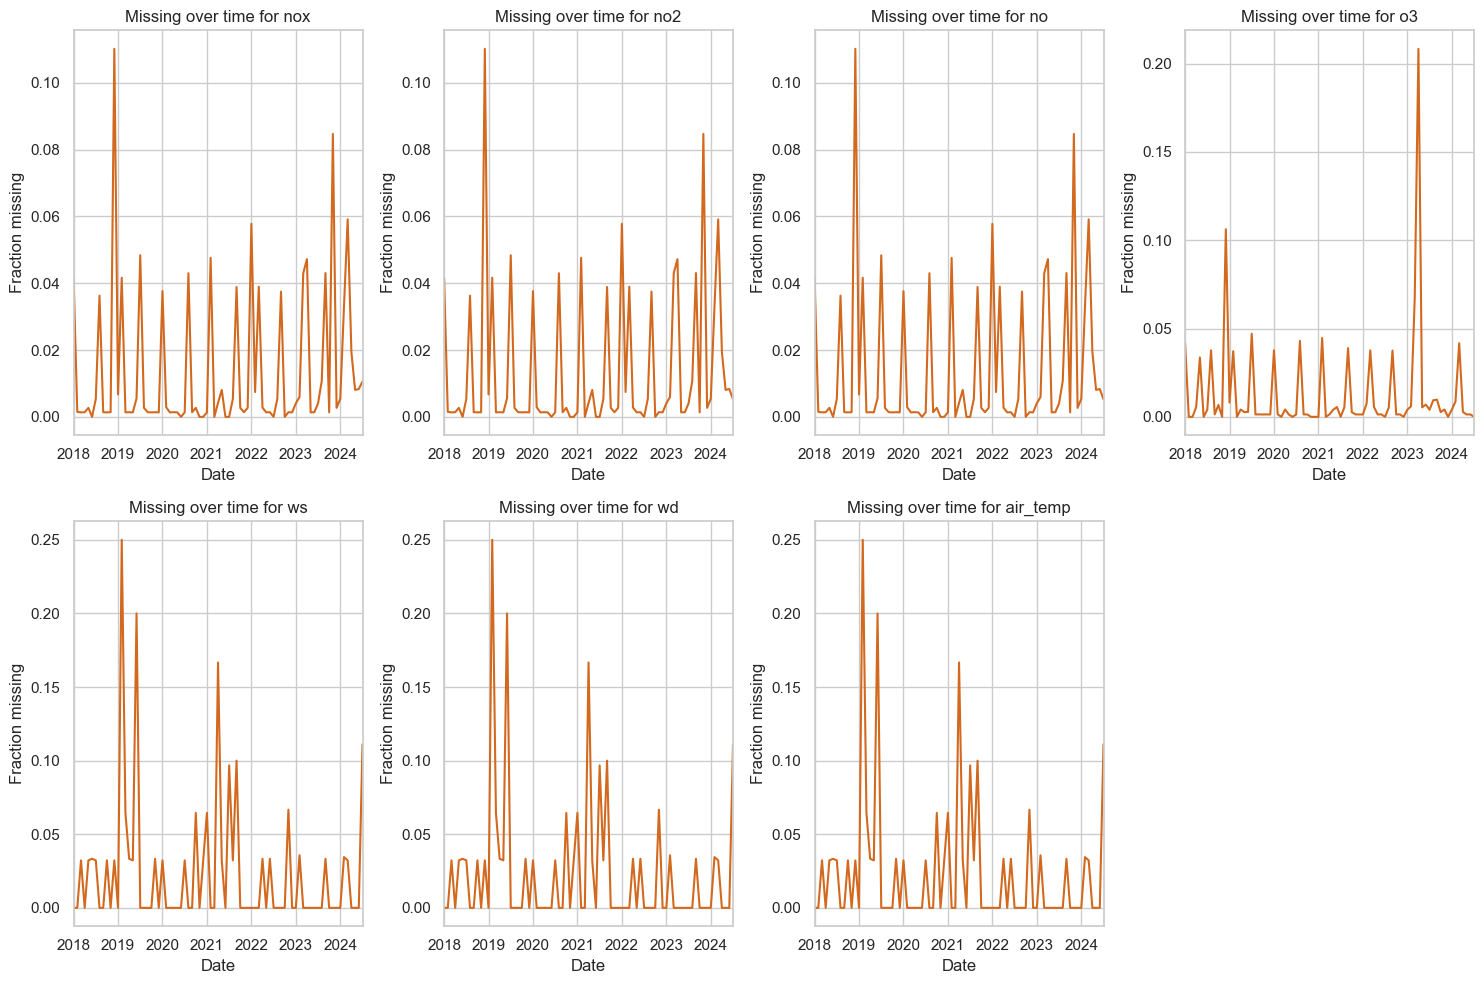

In [809]:
# Convert 'date' to datetime for the Sharston data
data_sharston.loc[:, 'date'] = pd.to_datetime(data_sharston['date'])

# Filter out the specified features from the Sharston data before plotting
features_sharston = data_sharston.select_dtypes(include = ['float64','int64']).columns
excluded_features = ['so2', 'pm2.5', 'v2.5', 'nv2.5', 'pm10']
features_sharston_filtered = [feature for feature in features_sharston if feature not in excluded_features]

# Execute the function to visualize missing values over time for Sharston's selected features
plot_missing_values_over_time(data_sharston, features_sharston_filtered)


### 2.4 Specify the target pollutants

Manchester Sharston : NOx(NO2,NO), O3
Manchester Piccadilly: NOx(NO2,NO), O3, SO2, PM2.5

In [813]:
# Filter columns based on the defined pollutants for each site
data_sharston_filtered = data_sharston[['date', 'site', 'code','ws','wd','air_temp','nox', 'no2', 'no', 'o3']]
data_piccadilly_filtered = data_piccadilly[['date', 'site', 'code','ws','wd','air_temp','nox', 'no2', 'no', 'o3', 'so2', 'pm2.5']] 

In [815]:
data_sharston_filtered.head()

date                 site  code   ws     wd  air_temp  \
0 2018-01-01 00:00:00+00:00  Manchester Sharston  MAHG  5.2  233.4       3.2   
1 2018-01-01 01:00:00+00:00  Manchester Sharston  MAHG  6.2  218.7       2.8   
2 2018-01-01 02:00:00+00:00  Manchester Sharston  MAHG  6.5  218.8       2.8   
3 2018-01-01 03:00:00+00:00  Manchester Sharston  MAHG  6.6  222.9       2.9   
4 2018-01-01 04:00:00+00:00  Manchester Sharston  MAHG  6.6  223.9       2.9   

        nox       no2       no        o3  
0  15.34736  13.01696  1.51985  59.53838  
1  13.59893  10.03859  2.32199  61.46756  
2  10.00492   7.43177  1.67817  64.01208  
3   8.01365   6.46005  1.01323  66.35703  
4  11.80193   8.69472  2.02647  66.55660

In [817]:
data_piccadilly_filtered.head()

date                   site  code   ws     wd  \
57141 2018-01-01 00:00:00+00:00  Manchester Piccadilly  MAN3  4.3  242.5   
57142 2018-01-01 01:00:00+00:00  Manchester Piccadilly  MAN3  4.8  222.4   
57143 2018-01-01 02:00:00+00:00  Manchester Piccadilly  MAN3  4.7  223.9   
57144 2018-01-01 03:00:00+00:00  Manchester Piccadilly  MAN3  4.8  225.9   
57145 2018-01-01 04:00:00+00:00  Manchester Piccadilly  MAN3  5.0  230.3   

       air_temp       nox       no2       no        o3      so2  pm2.5  
57141       4.0  44.61709  37.57883  4.59023       NaN  3.77322   14.0  
57142       3.4  29.69889  25.35174  2.83514  39.24877  4.12421    5.1  
57143       3.4  20.36643  18.03759  1.51883  48.34583  3.29060    1.5  
57144       3.3  25.62561  23.24502  1.55258  43.30669  3.75128    1.1  
57145       3.4  24.80064  23.04107  1.14756  43.25680  3.22479    0.2

 Air Temperature is normally distributed, so impute it with mean values, while other variables with skewed distributions, median values were used(except wd). 

### 2.5 Deal with missing values

In [820]:
# Define functions to impute missing values using median or mean values based on the distribution
def impute_values(df, columns_median, columns_mean):
    for column in columns_median:
        median = df[column].median()
        df.loc[:, column] = df[column].fillna(median)
    for column in columns_mean:
        mean = df[column].mean()
        df.loc[:, column] = df[column].fillna(mean)

mean_columns_sharston = ['air_temp']
median_columns_sharston = ['ws', 'nox', 'no2', 'no', 'o3']

mean_columns_piccadilly = ['air_temp']
median_columns_piccadilly = ['ws', 'nox', 'no2', 'no', 'o3', 'so2', 'pm2.5']

impute_values(data_sharston_filtered, mean_columns_sharston, median_columns_sharston)
impute_values(data_piccadilly_filtered, mean_columns_piccadilly, median_columns_piccadilly)

# Check the remaining missing values
remaining_missing_sharston_updated = data_sharston_filtered.isnull().sum()
remaining_missing_piccadilly_updated = data_piccadilly_filtered.isnull().sum()

remaining_missing_sharston_updated, remaining_missing_piccadilly_updated


(date           0
 site           0
 code           0
 ws             0
 wd          1269
 air_temp       0
 nox            0
 no2            0
 no             0
 o3             0
 dtype: int64,
 date           0
 site           0
 code           0
 ws             0
 wd          1269
 air_temp       0
 nox            0
 no2            0
 no             0
 o3             0
 so2            0
 pm2.5          0
 dtype: int64)

### 2.6 deal with missing values in wd

For wind direction (WD), which typically ranges from 0 to 360 degrees, handling missing values requires a special approach because it's a circular variable. 

In [823]:
import numpy as np

# Define a function to calculate mean direction for circular data
def calculate_mean_direction(angles):
    sin_sum = np.sum(np.sin(np.radians(angles)))
    cos_sum = np.sum(np.cos(np.radians(angles)))
    return np.degrees(np.arctan2(sin_sum, cos_sum)) % 360

# Calculate mean direction for wind direction in each dataset and impute missing values
mean_direction_sharston = calculate_mean_direction(data_sharston['wd'].dropna())
mean_direction_piccadilly = calculate_mean_direction(data_piccadilly['wd'].dropna())

data_sharston_filtered.loc[:, 'wd'] = data_sharston_filtered['wd'].fillna(mean_direction_sharston)
data_piccadilly_filtered.loc[:, 'wd'] = data_piccadilly_filtered['wd'].fillna(mean_direction_piccadilly)

# Check the remaining missing values after this imputation
remaining_missing_sharston_final = data_sharston_filtered.isnull().sum()
remaining_missing_piccadilly_final = data_piccadilly_filtered.isnull().sum()

remaining_missing_sharston_final, remaining_missing_piccadilly_final


(date        0
 site        0
 code        0
 ws          0
 wd          0
 air_temp    0
 nox         0
 no2         0
 no          0
 o3          0
 dtype: int64,
 date        0
 site        0
 code        0
 ws          0
 wd          0
 air_temp    0
 nox         0
 no2         0
 no          0
 o3          0
 so2         0
 pm2.5       0
 dtype: int64)

### 2.7 deal with outliers

In [224]:
def cap_outliers(data, columns):
    for column in columns:
        # Calculate Q1 and Q3
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        # Calculate IQR
        IQR = Q3 - Q1
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap values
        data.loc[data[column] < lower_bound, column] = lower_bound
        data.loc[data[column] > upper_bound, column] = upper_bound

# Columns to check for outliers in each dataset
columns_sharston = ['ws','air_temp','nox', 'no2', 'no', 'o3']
columns_piccadilly = ['ws','air_temp','nox', 'no2', 'no', 'o3', 'so2', 'pm2.5']

# Apply the function to cap outliers
cap_outliers(data_sharston_filtered, columns_sharston)
cap_outliers(data_piccadilly_filtered, columns_piccadilly)

# print or analyze the data to see the effects of capping
print("Data after capping outliers for Manchester Sharston:")
print(data_sharston_filtered.describe())

print("Data after capping outliers for Manchester Piccadilly:")
print(data_piccadilly_filtered.describe())

Data after capping outliers for Manchester Sharston:
                 ws            wd      air_temp           nox           no2  \
count  57141.000000  57141.000000  57141.000000  57141.000000  57141.000000   
mean       4.581220    198.075637      9.133148     21.866671     16.794006   
std        2.425737     79.331086      5.410459     16.240624     11.735420   
min        0.000000      0.100000     -6.100000      0.532350     -0.548250   
25%        2.700000    146.700000      5.300000      9.631660      7.773050   
50%        4.200000    204.600000      8.900000     16.373420     13.401140   
75%        6.000000    253.500000     12.900000     28.905180     22.688730   
max       10.950000    360.000000     24.300000     57.815460     45.062250   

                 no            o3  
count  57141.000000  57141.000000  
mean       3.027299     46.450619  
std        2.914091     23.444322  
min       -0.041990     -0.848170  
25%        0.810290     30.484320  
50%        1.832500

# 3、EDA(Exploration Data Analysis)

### 3.1 Correlation Analysis

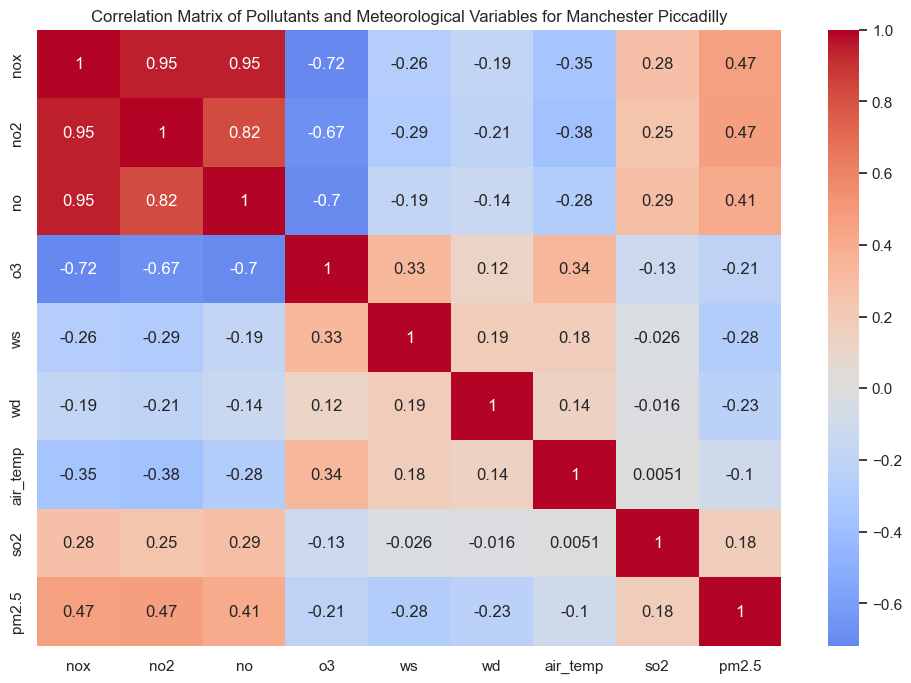

In [765]:
# Compute the correlation matrix
correlation_matrix = data_piccadilly_filtered[['nox', 'no2', 'no', 'o3', 'ws', 'wd', 'air_temp', 'so2', 'pm2.5']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Pollutants and Meteorological Variables for Manchester Piccadilly')
plt.show()

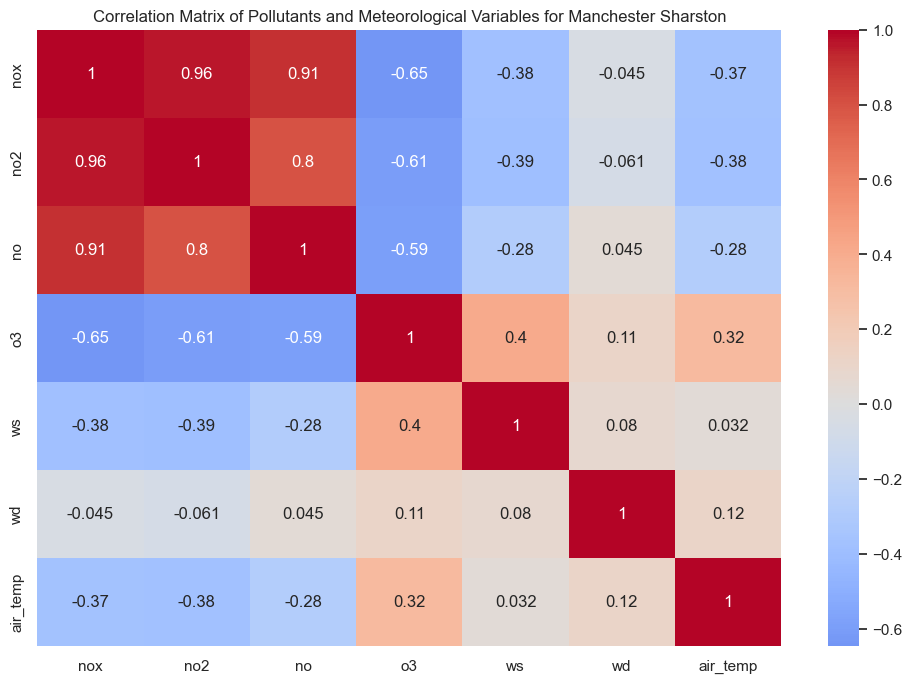

In [767]:
# Correlation Analysis
# Compute the correlation matrix
correlation_matrix = data_sharston_filtered[['nox', 'no2', 'no', 'o3', 'ws', 'wd', 'air_temp']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Pollutants and Meteorological Variables for Manchester Sharston')
plt.show()

### 3.2 Time Series Analysis and Comparison

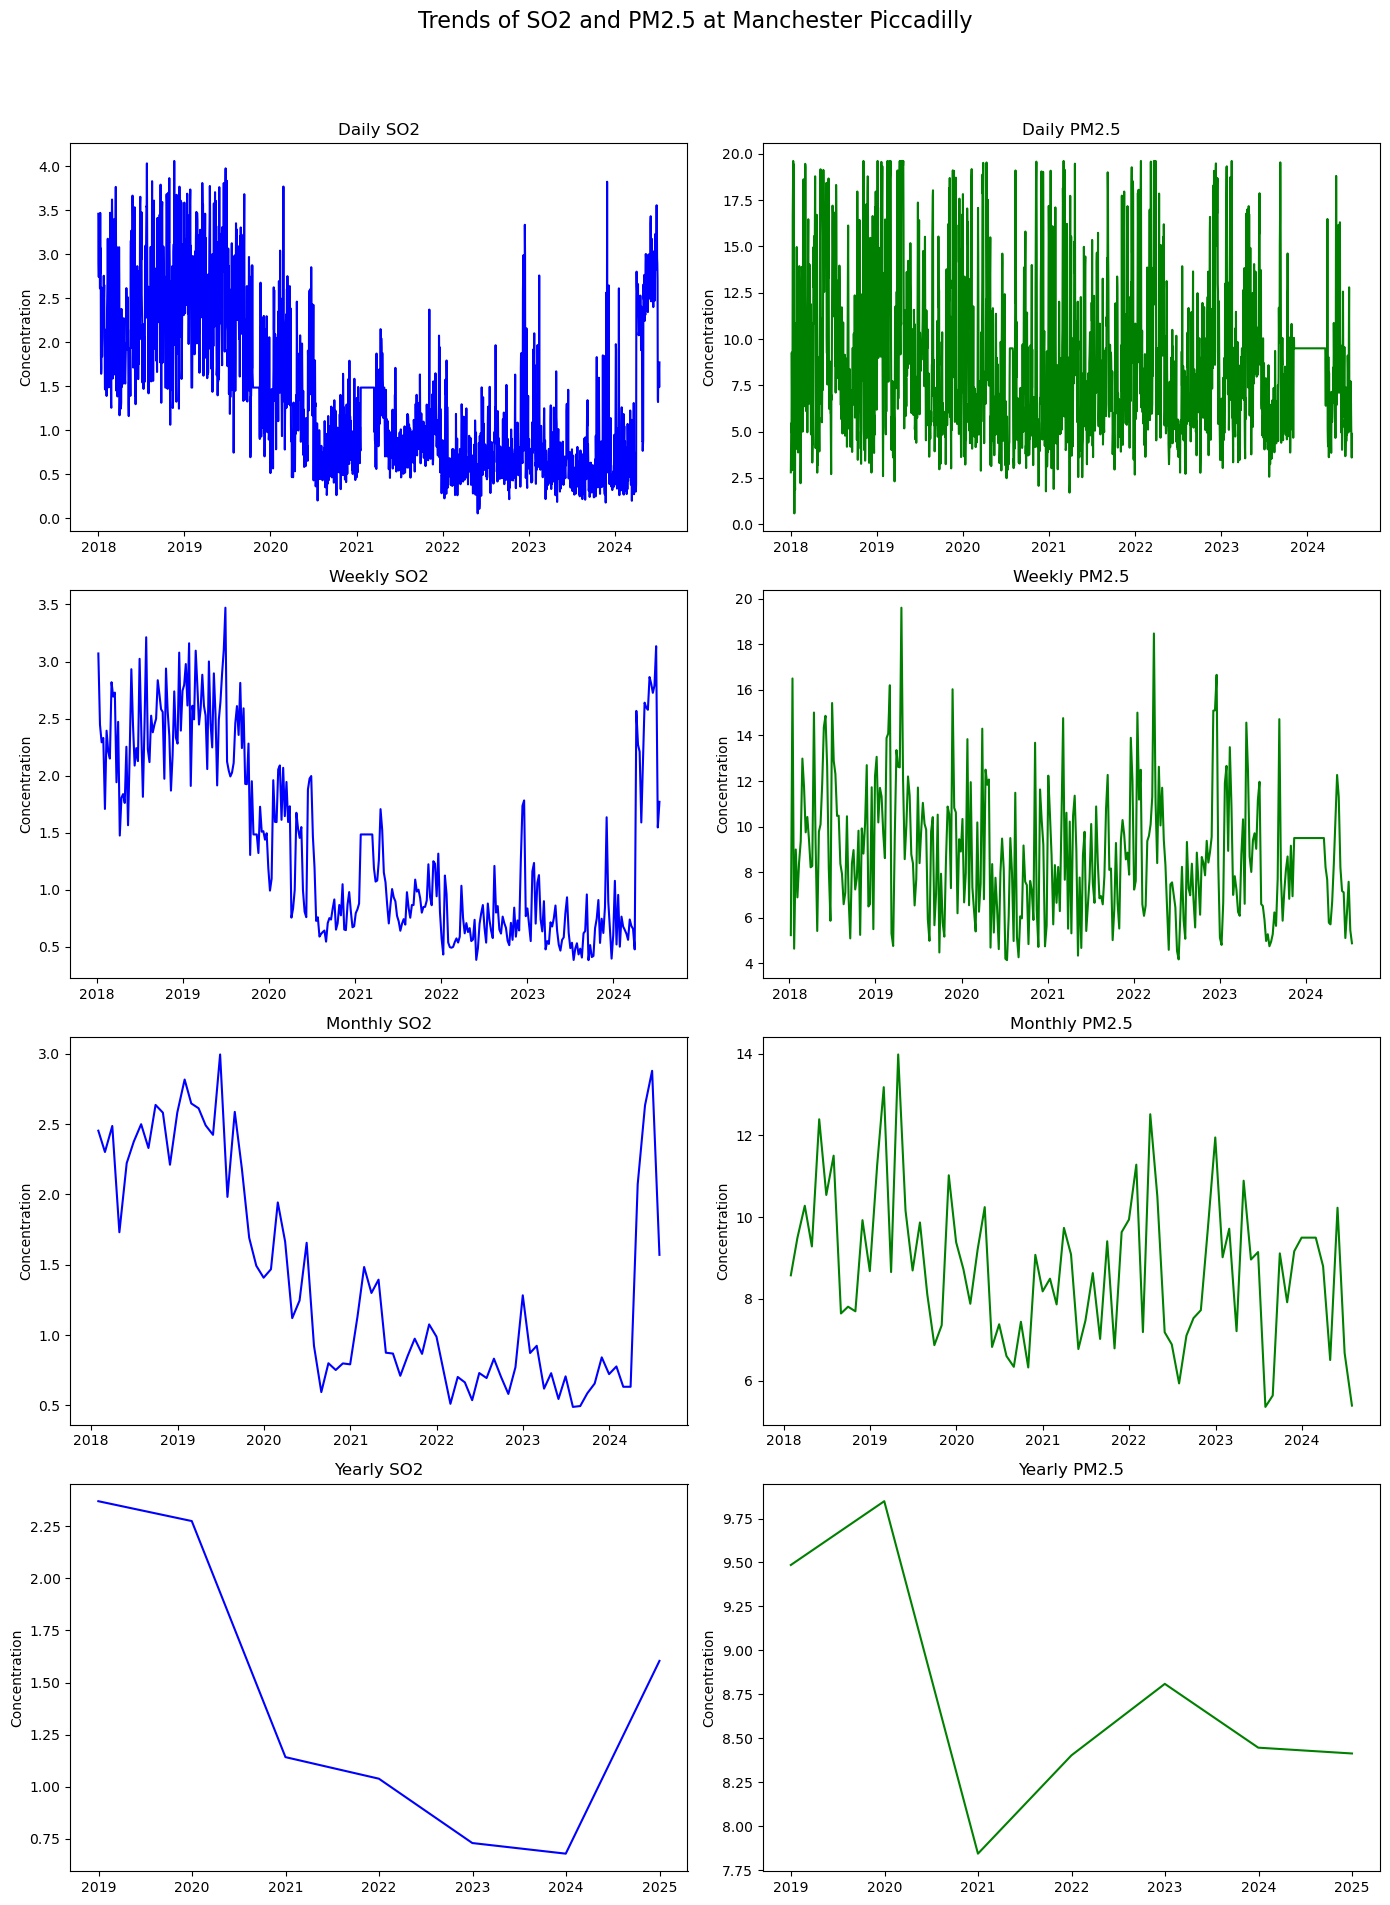

In [317]:
import matplotlib.pyplot as plt

# Convert date column to datetime type
#data['date'] = pd.to_datetime(data['date'])

# Set date as the index
#data.set_index('date', inplace=True)

# Resample and aggregate data for daily, weekly, monthly, and yearly trends
daily_so2 = data_piccadilly_filtered['so2'].resample('D').mean()
weekly_so2 = data_piccadilly_filtered['so2'].resample('W').mean()
monthly_so2 = data_piccadilly_filtered['so2'].resample('ME').mean()
yearly_so2 = data_piccadilly_filtered['so2'].resample('YE').mean()

daily_pm25 = data_piccadilly_filtered['pm2.5'].resample('D').mean()
weekly_pm25 = data_piccadilly_filtered['pm2.5'].resample('W').mean()
monthly_pm25 = data_piccadilly_filtered['pm2.5'].resample('ME').mean()
yearly_pm25 = data_piccadilly_filtered['pm2.5'].resample('YE').mean()

# Plotting the trends for SO2 and PM2.5
fig, axs = plt.subplots(4, 2, figsize=(14, 20))
fig.suptitle('Trends of SO2 and PM2.5 at Manchester Piccadilly', fontsize=16)

# Plot SO2 trends
axs[0, 0].plot(daily_so2.index, daily_so2, label='Daily SO2', color='blue')
axs[0, 0].set_title('Daily SO2')
axs[0, 0].set_ylabel('Concentration')

axs[1, 0].plot(weekly_so2.index, weekly_so2, label='Weekly SO2', color='blue')
axs[1, 0].set_title('Weekly SO2')
axs[1, 0].set_ylabel('Concentration')

axs[2, 0].plot(monthly_so2.index, monthly_so2, label='Monthly SO2', color='blue')
axs[2, 0].set_title('Monthly SO2')
axs[2, 0].set_ylabel('Concentration')

axs[3, 0].plot(yearly_so2.index, yearly_so2, label='Yearly SO2', color='blue')
axs[3, 0].set_title('Yearly SO2')
axs[3, 0].set_ylabel('Concentration')

# Plot PM2.5 trends
axs[0, 1].plot(daily_pm25.index, daily_pm25, label='Daily PM2.5', color='green')
axs[0, 1].set_title('Daily PM2.5')
axs[0, 1].set_ylabel('Concentration')

axs[1, 1].plot(weekly_pm25.index, weekly_pm25, label='Weekly PM2.5', color='green')
axs[1, 1].set_title('Weekly PM2.5')
axs[1, 1].set_ylabel('Concentration')

axs[2, 1].plot(monthly_pm25.index, monthly_pm25, label='Monthly PM2.5', color='green')
axs[2, 1].set_title('Monthly PM2.5')
axs[2, 1].set_ylabel('Concentration')

axs[3, 1].plot(yearly_pm25.index, yearly_pm25, label='Yearly PM2.5', color='green')
axs[3, 1].set_title('Yearly PM2.5')
axs[3, 1].set_ylabel('Concentration')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


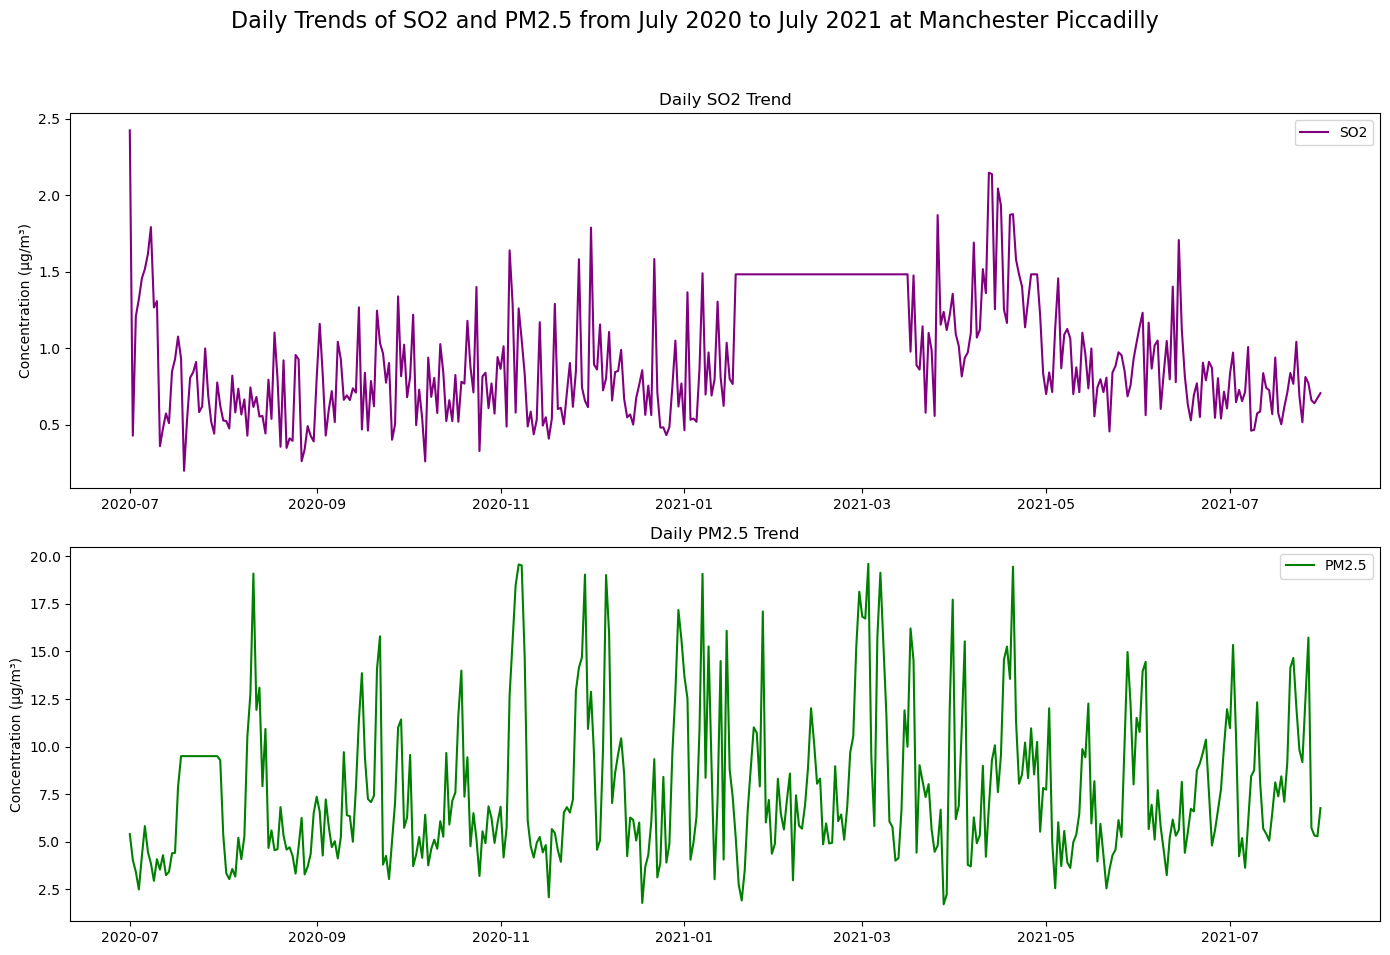

In [347]:
# Filter data for Piccadilly from July 2020 to July 2021 for SO2 and PM2.5
data_annual_piccadilly = data_piccadilly_filtered.loc['2020-07':'2021-07', ['so2', 'pm2.5']].resample('D').mean()

# Prepare plots for daily trends of SO2 and PM2.5 during this period
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Daily Trends of SO2 and PM2.5 from July 2020 to July 2021 at Manchester Piccadilly', fontsize=16)

# Plot SO2 trends
axs[0].plot(data_annual_piccadilly.index, data_annual_piccadilly['so2'], label='SO2', color='purple')
axs[0].set_title('Daily SO2 Trend')
axs[0].set_ylabel('Concentration (µg/m³)')
axs[0].legend()

# Plot PM2.5 trends
axs[1].plot(data_annual_piccadilly.index, data_annual_piccadilly['pm2.5'], label='PM2.5', color='green')
axs[1].set_title('Daily PM2.5 Trend')
axs[1].set_ylabel('Concentration (µg/m³)')
axs[1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


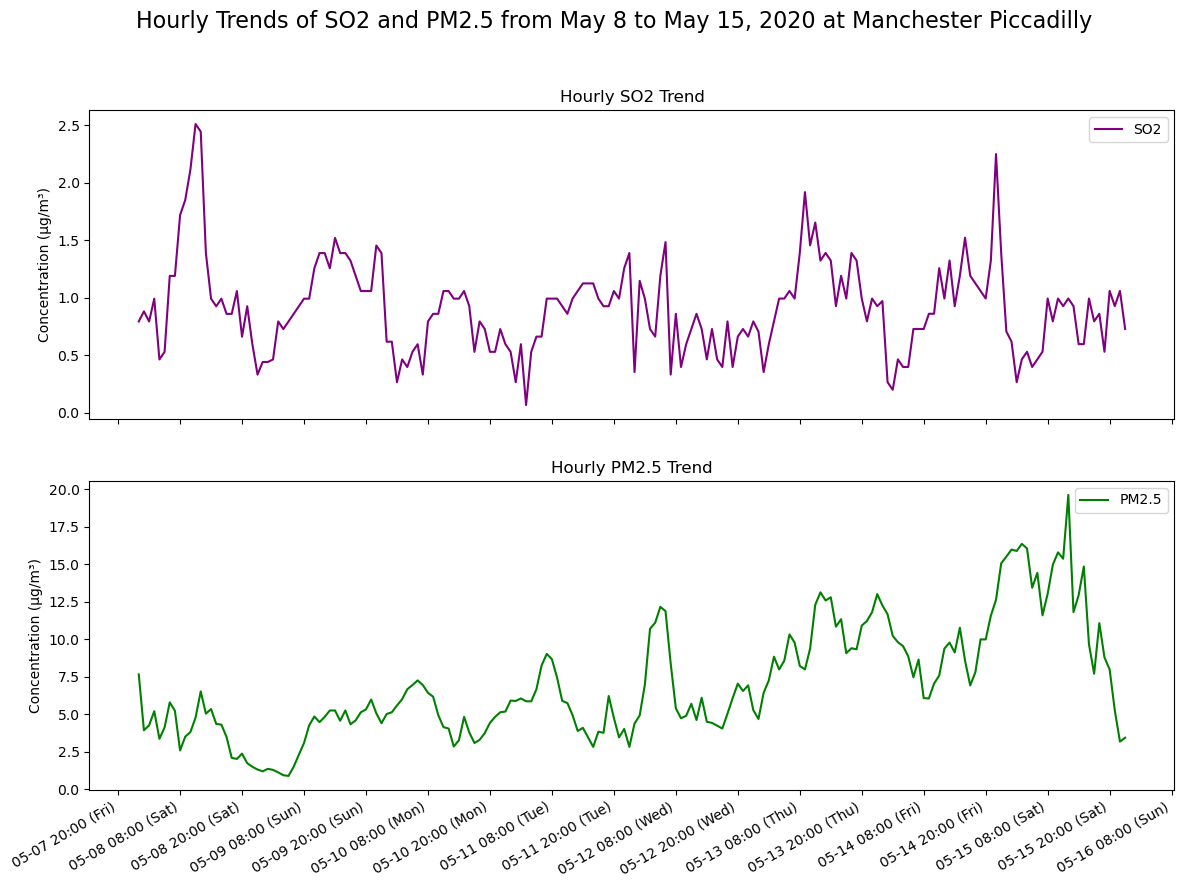

In [354]:
# Filter data for Piccadilly from May 8, 2020, to May 15, 2020, for SO2 and PM2.5
week_start_sept = '2021-05-08'
week_end_sept = '2021-05-15'

data_weekly_sept_piccadilly = data_piccadilly_filtered.loc[week_start_sept:week_end_sept, ['so2', 'pm2.5']]

# Prepare plots for hourly trends of SO2 and PM2.5 during this specific week
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Hourly Trends of SO2 and PM2.5 from May 8 to May 15, 2020 at Manchester Piccadilly', fontsize=16)

# Formatter for the x-axis
formatter_sept = mdates.DateFormatter('%m-%d %H:%M (%a)')  # Including day of the week
locator_sept = mdates.HourLocator(interval=12)  # Mark every 12 hours

# Plot SO2 trends
axs[0].plot(data_weekly_sept_piccadilly.index, data_weekly_sept_piccadilly['so2'], label='SO2', color='purple')
axs[0].set_title('Hourly SO2 Trend')
axs[0].set_ylabel('Concentration (µg/m³)')
axs[0].xaxis.set_major_formatter(formatter_sept)
axs[0].xaxis.set_major_locator(locator_sept)
axs[0].legend()

# Plot PM2.5 trends
axs[1].plot(data_weekly_sept_piccadilly.index, data_weekly_sept_piccadilly['pm2.5'], label='PM2.5', color='green')
axs[1].set_title('Hourly PM2.5 Trend')
axs[1].set_ylabel('Concentration (µg/m³)')
axs[1].xaxis.set_major_formatter(formatter_sept)
axs[1].xaxis.set_major_locator(locator_sept)
axs[1].legend()

# Adjust layout for better x-axis visibility
plt.gcf().autofmt_xdate()  # Auto formats the x-axis labels to fit them better
plt.show()


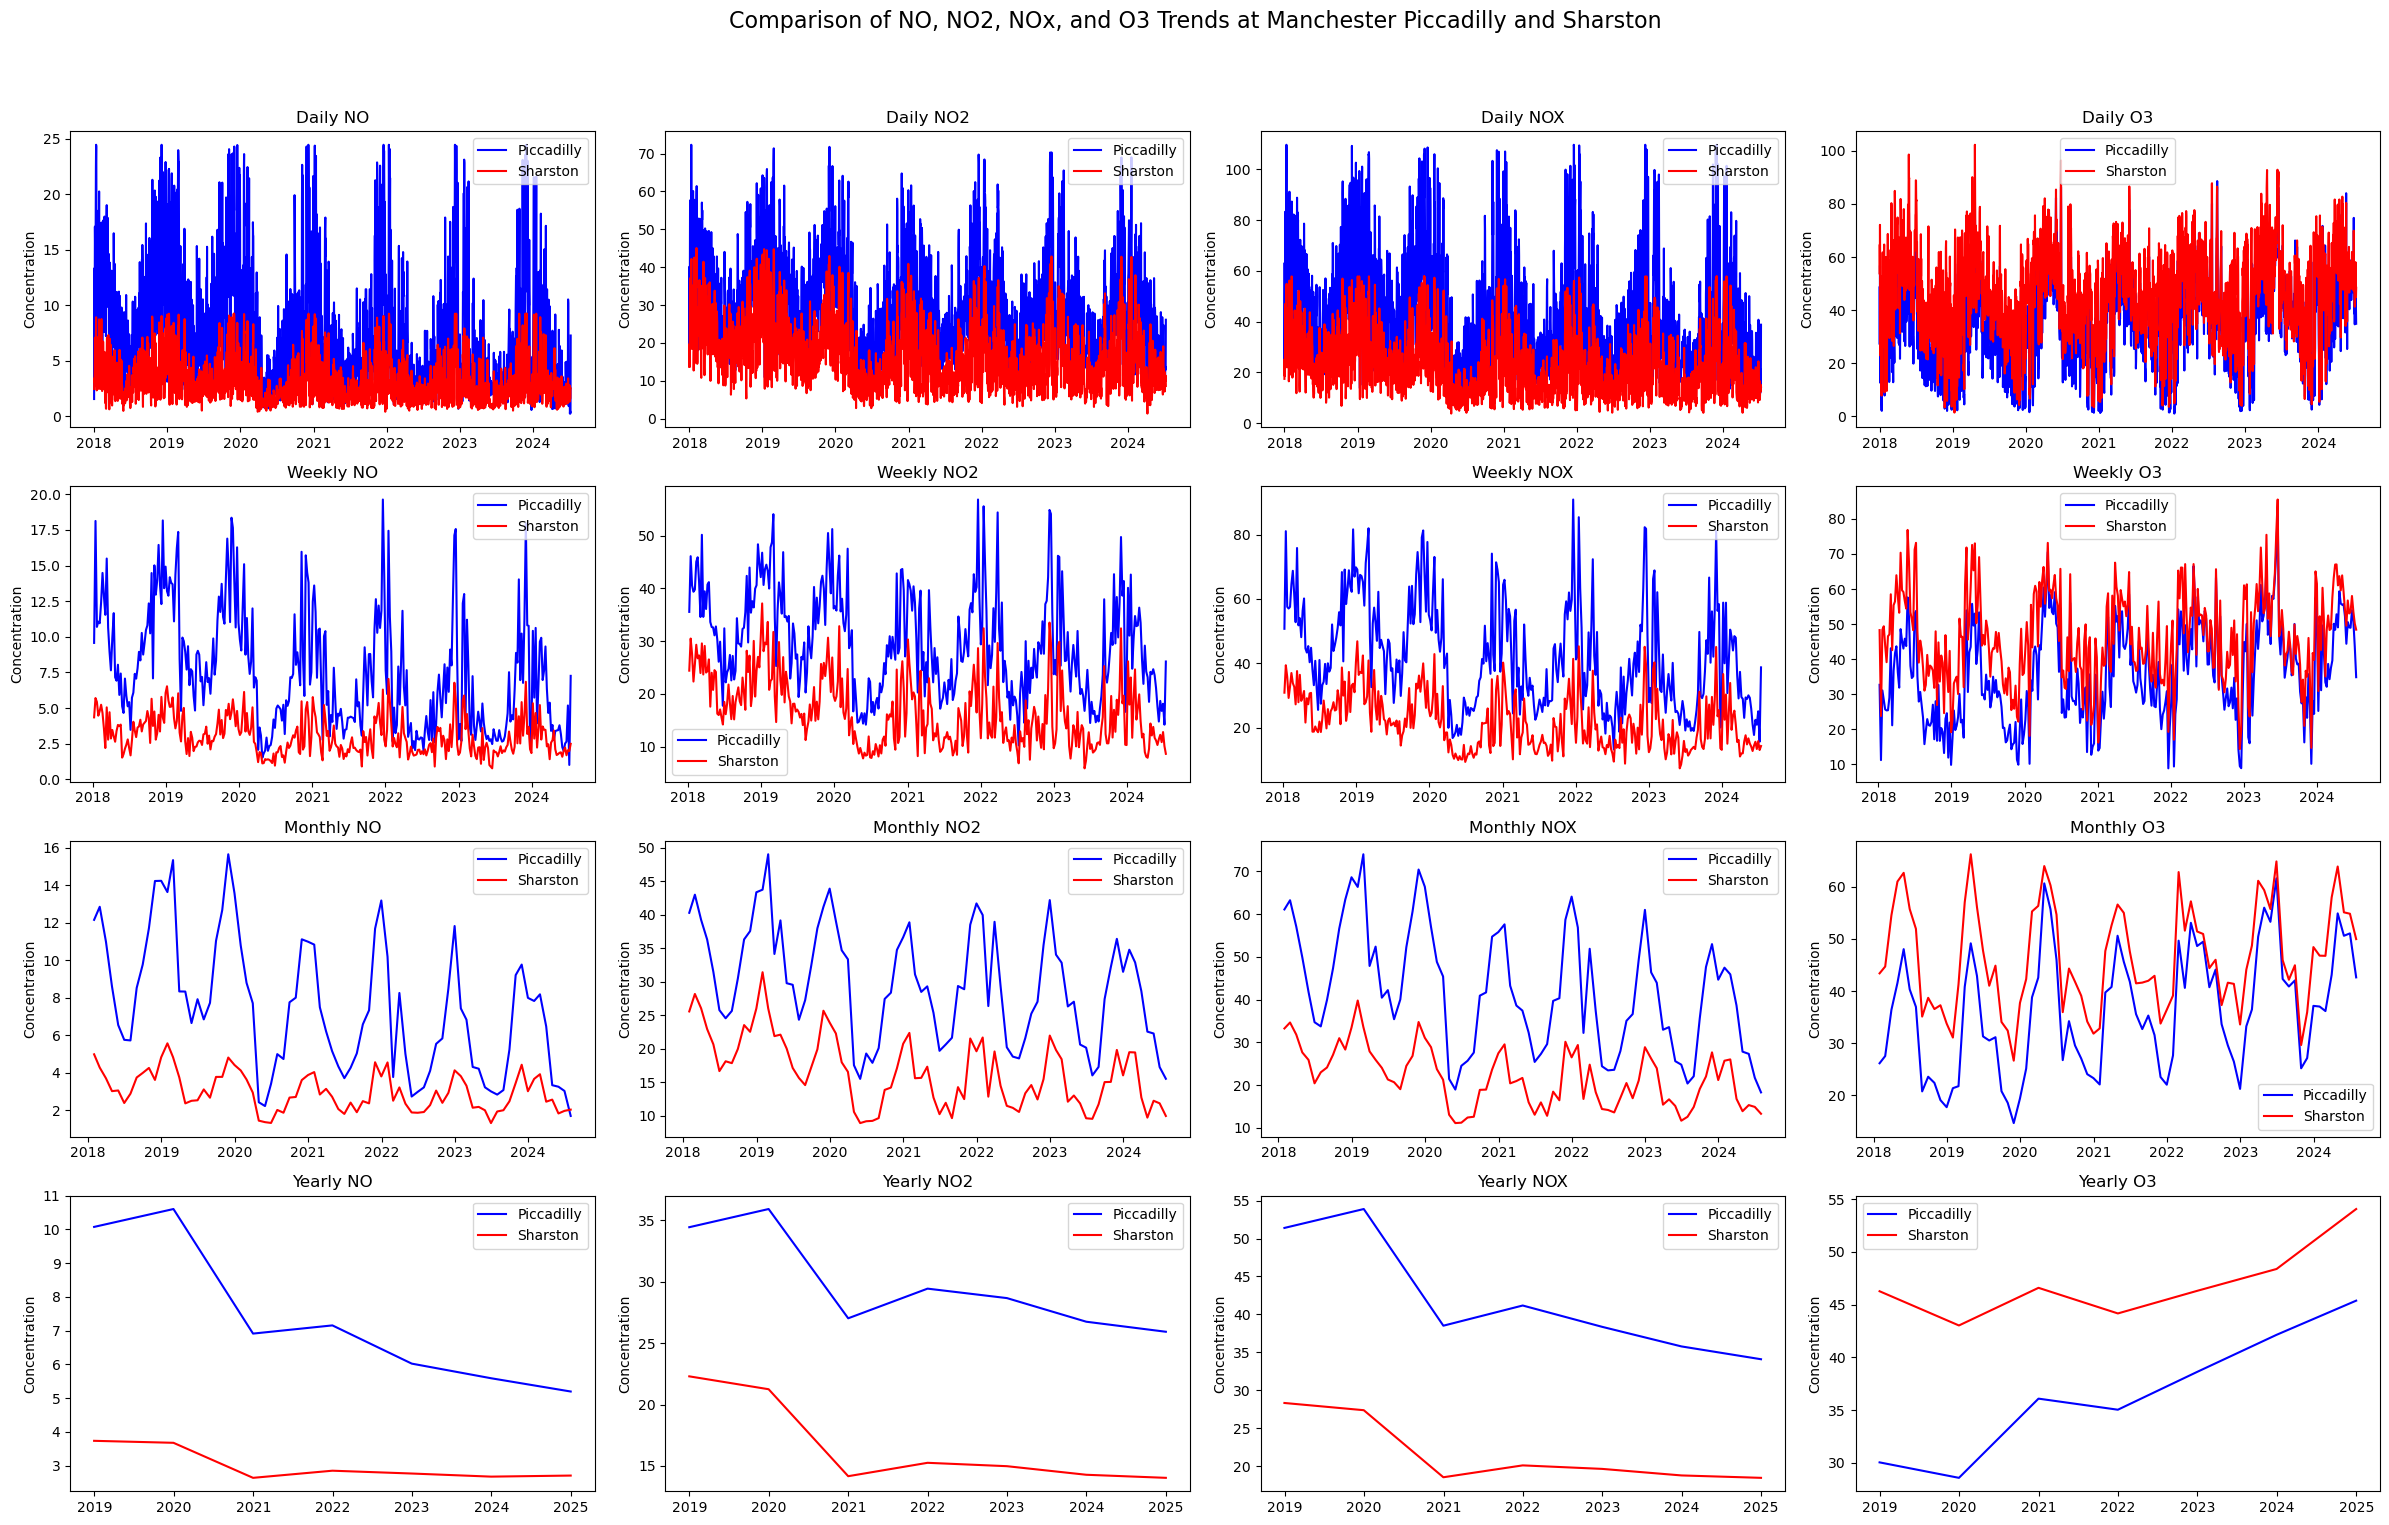

In [327]:
time_frames = ['D', 'W', 'ME', 'YE']  # Daily, Weekly, Monthly, Yearly
labels = ['Daily', 'Weekly', 'Monthly', 'Yearly']

# Update the list of pollutants to include O3, which is present in both datasets
pollutants = ['no', 'no2', 'nox', 'o3']

# Adjust the figure size to be wider
fig, axs = plt.subplots(len(time_frames), len(pollutants), figsize=(24, 16))  # Increased width from 18 to 24
fig.suptitle('Comparison of NO, NO2, NOx, and O3 Trends at Manchester Piccadilly and Sharston', fontsize=16)

# Iterate over pollutants and time frames to create plots
for col_idx, pollutant in enumerate(pollutants):
    for row_idx, frame in enumerate(time_frames):
        # Resample and aggregate for Piccadilly
        piccadilly_trend = data_piccadilly_filtered[pollutant].resample(frame).mean()
        # Resample and aggregate for Sharston
        sharston_trend = data_sharston_filtered[pollutant].resample(frame).mean()
        
        # Plotting
        axs[row_idx, col_idx].plot(piccadilly_trend.index, piccadilly_trend, label='Piccadilly', color='blue')
        axs[row_idx, col_idx].plot(sharston_trend.index, sharston_trend, label='Sharston', color='red')
        axs[row_idx, col_idx].set_title(f'{labels[row_idx]} {pollutant.upper()}')
        axs[row_idx, col_idx].legend()
        axs[row_idx, col_idx].set_ylabel('Concentration')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


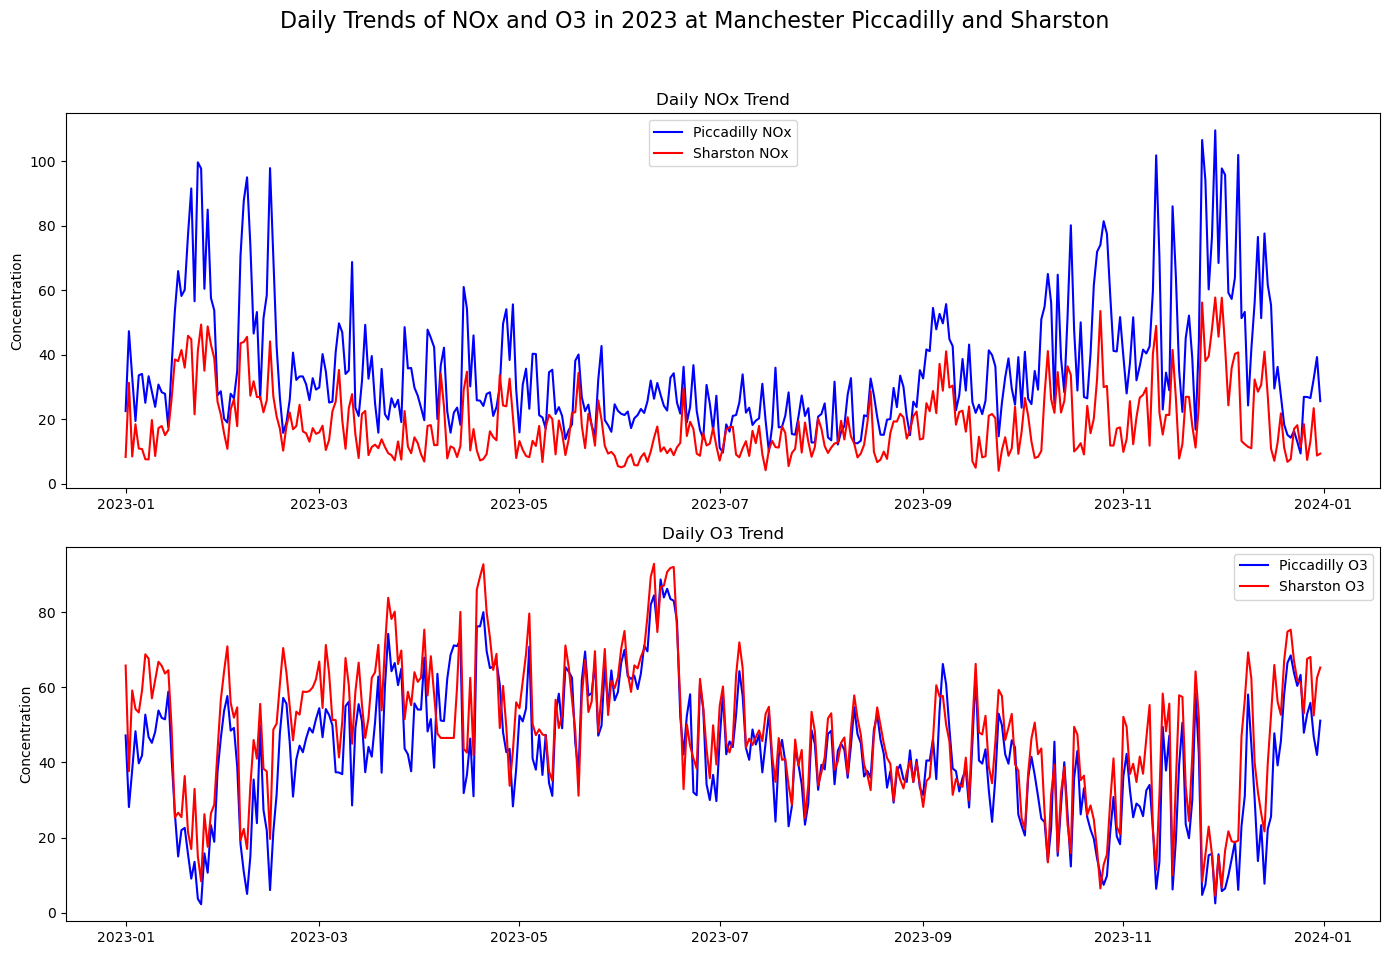

In [334]:
# Filter data for the year 2023 and focus on NOx and O3 for both sites
data_2023_piccadilly = data_piccadilly_filtered.loc['2023', ['nox', 'o3']].resample('D').mean()
data_2023_sharston = data_sharston_filtered.loc['2023', ['nox', 'o3']].resample('D').mean()
# Prepare plots for daily trends in 2023 for NOx and O3
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Daily Trends of NOx and O3 in 2023 at Manchester Piccadilly and Sharston', fontsize=16)

# Plot NOx trends
axs[0].plot(data_2023_piccadilly.index, data_2023_piccadilly['nox'], label='Piccadilly NOx', color='blue')
axs[0].plot(data_2023_sharston.index, data_2023_sharston['nox'], label='Sharston NOx', color='red')
axs[0].set_title('Daily NOx Trend')
axs[0].set_ylabel('Concentration')
axs[0].legend()

# Plot O3 trends
axs[1].plot(data_2023_piccadilly.index, data_2023_piccadilly['o3'], label='Piccadilly O3', color='blue')
axs[1].plot(data_2023_sharston.index, data_2023_sharston['o3'], label='Sharston O3', color='red')
axs[1].set_title('Daily O3 Trend')
axs[1].set_ylabel('Concentration')
axs[1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


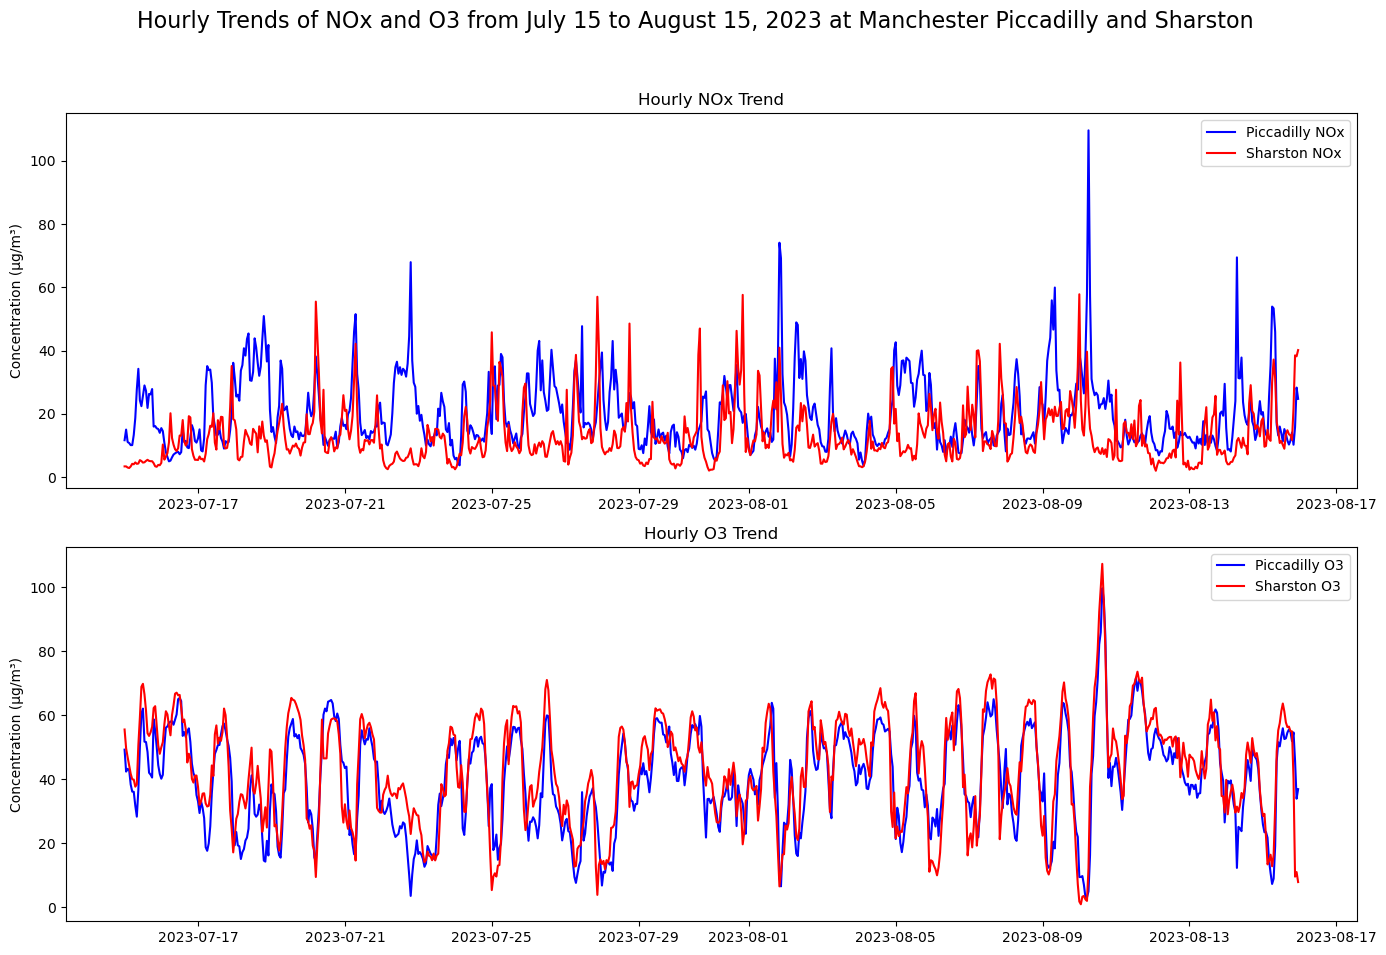

In [338]:
# Filter data for the period 15th July 2023 to 15th August 2023 and focus on hourly trends of NOx and O3
period_start = '2023-07-15'
period_end = '2023-08-15'

data_hourly_piccadilly = data_piccadilly_filtered.loc[period_start:period_end, ['nox', 'o3']]
data_hourly_sharston = data_sharston_filtered.loc[period_start:period_end, ['nox', 'o3']]

# Prepare plots for hourly trends of NOx and O3 during this period
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Hourly Trends of NOx and O3 from July 15 to August 15, 2023 at Manchester Piccadilly and Sharston', fontsize=16)

# Plot NOx trends
axs[0].plot(data_hourly_piccadilly.index, data_hourly_piccadilly['nox'], label='Piccadilly NOx', color='blue')
axs[0].plot(data_hourly_sharston.index, data_hourly_sharston['nox'], label='Sharston NOx', color='red')
axs[0].set_title('Hourly NOx Trend')
axs[0].set_ylabel('Concentration (µg/m³)')
axs[0].legend()

# Plot O3 trends
axs[1].plot(data_hourly_piccadilly.index, data_hourly_piccadilly['o3'], label='Piccadilly O3', color='blue')
axs[1].plot(data_hourly_sharston.index, data_hourly_sharston['o3'], label='Sharston O3', color='red')
axs[1].set_title('Hourly O3 Trend')
axs[1].set_ylabel('Concentration (µg/m³)')
axs[1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


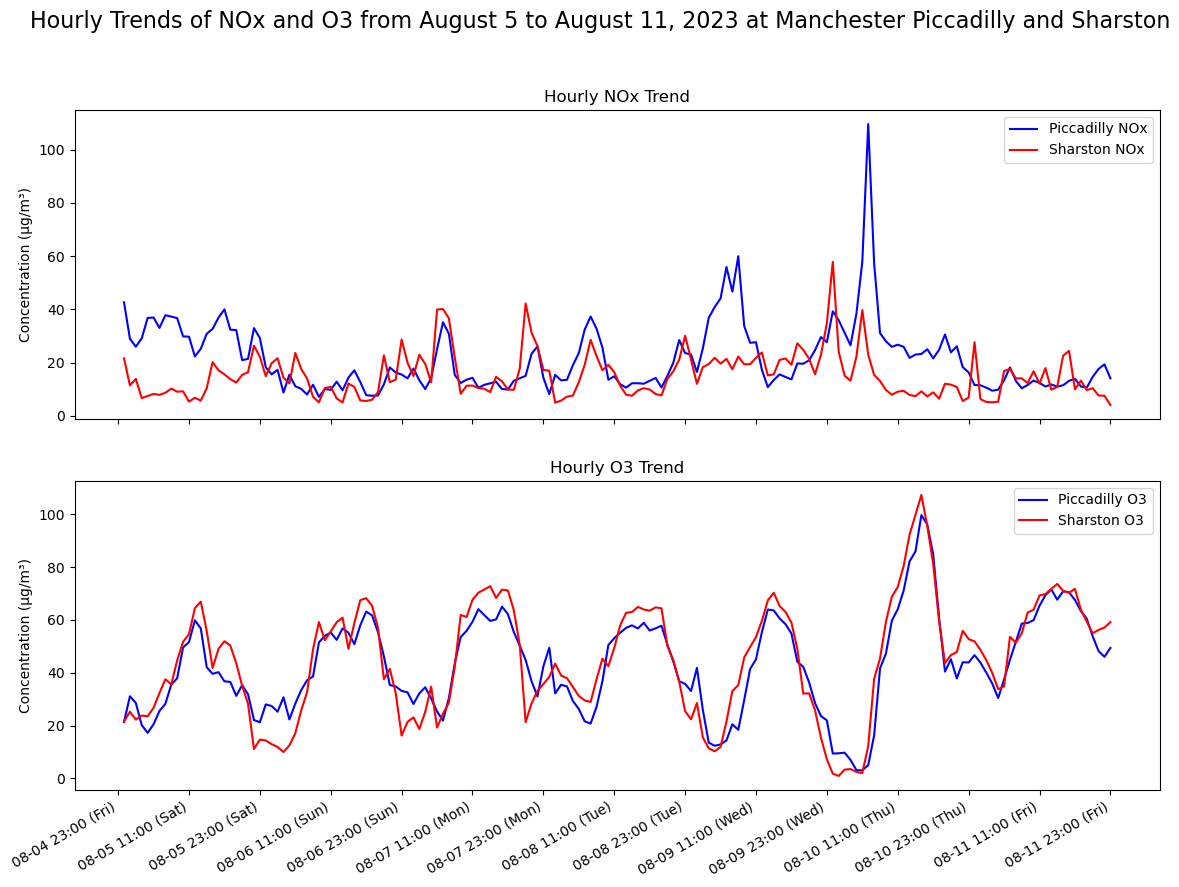

In [343]:
import matplotlib.dates as mdates

# Filter data for the specific week from August 5, 2023, to August 11, 2023
week_start = '2023-08-05'
week_end = '2023-08-11'

data_weekly_piccadilly = data_piccadilly_filtered.loc[week_start:week_end, ['nox', 'o3']]
data_weekly_sharston = data_sharston_filtered.loc[week_start:week_end, ['nox', 'o3']]

#mark every 12 hours 
# Formatter for the x-axis
formatter = mdates.DateFormatter('%m-%d %H:%M (%a)')  # Including day of the week
locator_12hr = mdates.HourLocator(interval=12)  # Mark every 12 hours

# Prepare plots again with x-axis intervals
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Hourly Trends of NOx and O3 from August 5 to August 11, 2023 at Manchester Piccadilly and Sharston', fontsize=16)

# Plot NOx trends 
axs[0].plot(data_weekly_piccadilly.index, data_weekly_piccadilly['nox'], label='Piccadilly NOx', color='blue')
axs[0].plot(data_weekly_sharston.index, data_weekly_sharston['nox'], label='Sharston NOx', color='red')
axs[0].set_title('Hourly NOx Trend')
axs[0].set_ylabel('Concentration (µg/m³)')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].xaxis.set_major_locator(locator_12hr)
axs[0].legend()

# Plot O3 trends 
axs[1].plot(data_weekly_piccadilly.index, data_weekly_piccadilly['o3'], label='Piccadilly O3', color='blue')
axs[1].plot(data_weekly_sharston.index, data_weekly_sharston['o3'], label='Sharston O3', color='red')
axs[1].set_title('Hourly O3 Trend')
axs[1].set_ylabel('Concentration (µg/m³)')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].xaxis.set_major_locator(locator_12hr)
axs[1].legend()

# Adjust layout for better x-axis visibility
plt.gcf().autofmt_xdate()  # Auto formats the x-axis labels to fit them better
plt.show()


### 3.3 Feature Engineering

## 4、Modelling

### 4.1 Data Transform

In [378]:
from sklearn.preprocessing import MinMaxScaler

# Extracting numeric columns for scaling
numeric_columns = data_piccadilly_filtered.select_dtypes(include=['float64']).columns
data_numeric = data_piccadilly_filtered[numeric_columns]

# Initialize the StandardScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)
piccadilly_scaled = pd.DataFrame(data_scaled, columns=numeric_columns)

piccadilly_scaled.head()

ws        wd  air_temp       nox       no2        no        o3  \
0  0.5375  0.673611  0.326923  0.393654  0.483904  0.214551  0.360101   
1  0.6000  0.617778  0.307692  0.254563  0.317571  0.145183  0.392923   
2  0.5875  0.621944  0.307692  0.167551  0.218072  0.093158  0.484226   
3  0.6000  0.627500  0.304487  0.216586  0.288912  0.094492  0.433650   
4  0.6250  0.639722  0.307692  0.208894  0.286137  0.078484  0.433150   

        so2     pm2.5  
0  0.929835  0.756226  
1  1.000000  0.369421  
2  0.810903  0.212960  
3  0.924428  0.195576  
4  0.794685  0.156461

In [380]:
# do the same for sharston
numeric_columns1 = data_sharston_filtered.select_dtypes(include=['float64']).columns
data_numeric1 = data_sharston_filtered[numeric_columns1]
data_scaled = scaler.fit_transform(data_numeric1)
sharston_scaled = pd.DataFrame(data_scaled, columns=numeric_columns1)

sharston_scaled.head()

ws        wd  air_temp       nox       no2        no        o3
0  0.474886  0.648236  0.305921  0.258628  0.297414  0.168474  0.537210
1  0.566210  0.607391  0.292763  0.228105  0.232114  0.254999  0.554372
2  0.593607  0.607669  0.292763  0.165364  0.174960  0.185551  0.577008
3  0.602740  0.619061  0.296053  0.130602  0.153655  0.113825  0.597870
4  0.602740  0.621839  0.296053  0.196735  0.202650  0.223122  0.599645

In [572]:
# Save the Manchester Piccadilly filtered data to a CSV file
piccadilly_scaled.to_csv('piccadilly_scaled.csv', index=False)

# Save the Manchester Sharston filtered data to a CSV file
sharston_scaled.to_csv('sharston_scaled.csv', index=False)

### 4.2 Modelling-LR

### 4.2.1 Piccadilly

In [641]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Placeholder function for creating lagged features, needs implementation
def create_lagged_features(data, target, lags):
    lagged_data = data.copy()
    for lag in range(1, lags+1):
        lagged_data[f"{target}_lag{lag}"] = data[target].shift(lag)
    return lagged_data

pollutants = ['nox', 'o3', 'so2', 'pm2.5']

def prepare_data_for_model(data, pollutant, lags, forecast_horizon):
    if pollutant == 'nox':
        relevant_columns = ['wd', 'ws', 'air_temp', 'o3', 'pm2.5', pollutant]
    elif pollutant == 'o3':
        relevant_columns = ['ws', 'air_temp', 'wd', 'nox', pollutant]
    elif pollutant == 'so2':
        relevant_columns = ['ws', 'air_temp', 'wd', pollutant]
    elif pollutant == 'pm2.5':
        relevant_columns = ['wd', 'ws', 'air_temp', 'nox', pollutant]
    
    data_filtered = data[relevant_columns].copy()
    data_lagged = create_lagged_features(data_filtered, pollutant, lags)
    data_lagged[pollutant] = data_lagged[pollutant].shift(-forecast_horizon + 1)
    data_lagged = data_lagged.dropna()
    return data_lagged

def train_and_evaluate(data, pollutant, lags, forecast_horizon):
    prepared_data = prepare_data_for_model(data, pollutant, lags, forecast_horizon)

    X = prepared_data.drop(pollutant, axis=1)
    y = prepared_data[pollutant]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, rmse, mse, mae

forecast_horizons = {
    "1h": 24,
    "6h": 36,
    "12h": 48,
    "24h": 72,
    "48h": 96
}

all_results = []

for horizon, lags in forecast_horizons.items():
    for pollutant in pollutants:
        r2, rmse, mse, mae = train_and_evaluate(piccadilly_scaled, pollutant, lags, int(horizon[:-1]))
        all_results.append([horizon, pollutant, r2, rmse, mse, mae])

results_df = pd.DataFrame(all_results, columns=["Forecast Horizon", "Pollutant", "R2", "RMSE", "MSE", "MAE"])
print('LR for NOx, O3, SO2, and PM2.5 in Piccadilly:')
print(results_df)

LR for NOx, O3, SO2, and PM2.5 in Piccadilly:
   Forecast Horizon Pollutant        R2      RMSE       MSE       MAE
0                1h       nox  0.874102  0.095945  0.009205  0.068139
1                1h        o3  0.929317  0.057508  0.003307  0.042279
2                1h       so2  0.808825  0.118284  0.013991  0.076444
3                1h     pm2.5  0.864502  0.079021  0.006244  0.051999
4                6h       nox  0.438325  0.205438  0.042205  0.155789
5                6h        o3  0.528634  0.148842  0.022154  0.117297
6                6h       so2  0.528508  0.185380  0.034366  0.129758
7                6h     pm2.5  0.484661  0.153589  0.023590  0.115111
8               12h       nox  0.379904  0.213918  0.045761  0.163323
9               12h        o3  0.439233  0.161403  0.026051  0.128787
10              12h       so2  0.485067  0.193079  0.037280  0.137121
11              12h     pm2.5  0.363429  0.172702  0.029826  0.132353
12              24h       nox  0.340927  0.2

### 4.2.2 Sharston

In [643]:
pollutants = ['nox', 'o3']
all_results = []

def prepare_data_for_model(data, pollutant, lags, forecast_horizon):
    if pollutant == 'nox':
        relevant_columns = ['wd', 'ws', 'air_temp', 'o3', pollutant]
    elif pollutant == 'o3':
        relevant_columns = ['ws', 'air_temp', 'wd', 'nox', pollutant]
    
    data_filtered = data[relevant_columns].copy()
    data_lagged = create_lagged_features(data_filtered, pollutant, lags)
    data_lagged[pollutant] = data_lagged[pollutant].shift(-forecast_horizon + 1)
    data_lagged = data_lagged.dropna()
    return data_lagged
    
for horizon, lags in forecast_horizons.items():
    for pollutant in pollutants:
        r2, rmse, mse, mae = train_and_evaluate(sharston_scaled, pollutant, lags, int(horizon[:-1]))
        all_results.append([horizon, pollutant, r2, rmse, mse, mae])

# Convert results to DataFrame
results_df = pd.DataFrame(all_results, columns=["Forecast Horizon", "Pollutant", "R2", "RMSE", "MSE", "MAE"])
print('LR for NOx and O3 in Sharston:')
print(results_df)

LR for NOx and O3 in Sharston:
  Forecast Horizon Pollutant        R2      RMSE       MSE       MAE
0               1h       nox  0.823378  0.119089  0.014182  0.081788
1               1h        o3  0.917256  0.060135  0.003616  0.042787
2               6h       nox  0.394143  0.222124  0.049339  0.170356
3               6h        o3  0.490504  0.149512  0.022354  0.116602
4              12h       nox  0.321659  0.233862  0.054691  0.180670
5              12h        o3  0.399404  0.160861  0.025876  0.127301
6              24h       nox  0.255252  0.245518  0.060279  0.189403
7              24h        o3  0.369966  0.165793  0.027487  0.132656
8              48h       nox  0.188784  0.255283  0.065169  0.199855
9              48h        o3  0.276185  0.178446  0.031843  0.143061


### 4.3 Modelling-XGBoost

In [484]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.8 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


### 4.3.1 Piccadilly

In [663]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Placeholder function for creating lagged features, needs implementation
def create_lagged_features(data, target, lags):
    lagged_data = data.copy()
    for lag in range(1, lags + 1):
        lagged_data[f"{target}_lag{lag}"] = data[target].shift(lag)
    return lagged_data

pollutants = ['nox', 'o3', 'so2', 'pm2.5']

def prepare_data_for_model(data, pollutant, lags, forecast_horizon):
    if pollutant == 'nox':
        relevant_columns = ['wd', 'ws', 'air_temp', 'o3', 'pm2.5', pollutant]
    elif pollutant == 'o3':
        relevant_columns = ['ws', 'air_temp', 'wd', 'nox', pollutant]
    elif pollutant == 'so2':
        relevant_columns = ['ws', 'air_temp', 'wd', pollutant]
    elif pollutant == 'pm2.5':
        relevant_columns = ['wd', 'ws', 'air_temp', 'nox', pollutant]
    
    data_filtered = data[relevant_columns].copy()
    data_lagged = create_lagged_features(data_filtered, pollutant, lags)
    data_lagged[pollutant] = data_lagged[pollutant].shift(-forecast_horizon + 1)
    data_lagged = data_lagged.dropna()
    return data_lagged

def train_and_evaluate(data, pollutant, lags, forecast_horizon):
    prepared_data = prepare_data_for_model(data, pollutant, lags, forecast_horizon)

    X = prepared_data.drop(pollutant, axis=1)
    y = prepared_data[pollutant]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, rmse, mse, mae

forecast_horizons = {
    "1h": 24,
    "6h": 36,
    "12h": 48,
    "24h": 72,
    "48h": 96
}

all_results = []

for horizon, lags in forecast_horizons.items():
    for pollutant in pollutants:
        r2, rmse, mse, mae = train_and_evaluate(piccadilly_scaled, pollutant, lags, int(horizon[:-1]))
        all_results.append([horizon, pollutant, r2, rmse, mse, mae])

results_df = pd.DataFrame(all_results, columns=["Forecast Horizon", "Pollutant", "R2", "RMSE", "MSE", "MAE"])
print('XGBoost for NOx, O3, SO2, and PM2.5 in Piccadilly:')
print(results_df)

XGBoost for NOx, O3, SO2, and PM2.5 in Piccadilly:
   Forecast Horizon Pollutant        R2      RMSE       MSE       MAE
0                1h       nox  0.912026  0.080203  0.006432  0.055175
1                1h        o3  0.945235  0.050620  0.002562  0.037008
2                1h       so2  0.814191  0.116612  0.013598  0.075890
3                1h     pm2.5  0.872068  0.076783  0.005896  0.049920
4                6h       nox  0.560808  0.181663  0.033001  0.134562
5                6h        o3  0.614428  0.134616  0.018122  0.105798
6                6h       so2  0.564390  0.178186  0.031750  0.124978
7                6h     pm2.5  0.547713  0.143887  0.020703  0.105512
8               12h       nox  0.468191  0.198105  0.039246  0.148828
9               12h        o3  0.536804  0.146691  0.021518  0.117068
10              12h       so2  0.531337  0.184201  0.033930  0.130687
11              12h     pm2.5  0.450626  0.160438  0.025740  0.120237
12              24h       nox  0.426642

### 4.3.2 Sharston

In [653]:
pollutants = ['nox', 'o3']
all_results = []
def prepare_data_for_model(data, pollutant, lags, forecast_horizon):
    if pollutant == 'nox':
        relevant_columns = ['wd', 'ws', 'air_temp', 'o3',  pollutant]
    elif pollutant == 'o3':
        relevant_columns = ['ws', 'air_temp', 'wd', 'nox', pollutant]
    
    data_filtered = data[relevant_columns].copy()
    data_lagged = create_lagged_features(data_filtered, pollutant, lags)
    data_lagged[pollutant] = data_lagged[pollutant].shift(-forecast_horizon + 1)
    data_lagged = data_lagged.dropna()
    return data_lagged

for horizon, lags in forecast_horizons.items():
    for pollutant in pollutants:
        r2, rmse, mse, mae = train_and_evaluate(sharston_scaled, pollutant, lags, int(horizon[:-1]))
        all_results.append([horizon, pollutant, r2, rmse, mse, mae])

# Convert results to DataFrame
results_df = pd.DataFrame(all_results, columns=["Forecast Horizon", "Pollutant", "R2", "RMSE", "MSE", "MAE"])
print('XGBoost for NOx and O3 in Sharston:')
print(results_df)

XGBoost for NOx and O3 in Sharston:
  Forecast Horizon Pollutant        R2      RMSE       MSE       MAE
0               1h       nox  0.862825  0.104951  0.011015  0.069335
1               1h        o3  0.933912  0.053743  0.002888  0.038010
2               6h       nox  0.492813  0.203233  0.041304  0.151805
3               6h        o3  0.598501  0.132724  0.017616  0.102423
4              12h       nox  0.408634  0.218355  0.047679  0.166411
5              12h        o3  0.525804  0.142935  0.020430  0.113167
6              24h       nox  0.333205  0.232313  0.053970  0.177916
7              24h        o3  0.465575  0.152696  0.023316  0.122570
8              48h       nox  0.273003  0.241669  0.058404  0.188232
9              48h        o3  0.386952  0.164225  0.026970  0.131707


### 4.4 LSTM of CNN

In [554]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 240.2 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 3.7 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 637.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 498.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.4/394.4 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 4.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use u

### 4.4.1 Piccadilly

In [655]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd

# Create time windows
def create_windowed_dataset(df, target, window_size, additional_features):
    X, y = [], []
    for i in range(len(df) - window_size):
        features = df[additional_features].iloc[i:i + window_size].values
        target_history = df[target].iloc[i:i + window_size].values.reshape(-1, 1)
        X.append(np.hstack((features, target_history)))
        y.append(df[target].iloc[i + window_size])
    return np.array(X), np.array(y)

# Define the window sizes for different predictions
windows = {
    '1h': 24,
    '6h': 36,
    '12h': 48,
    '24h': 72,
    '48h': 96
}

# Define target columns and corresponding features for different horizons
features_dict = {
    'nox': ['wd', 'ws', 'air_temp', 'o3', 'pm2.5'],
    'o3': ['ws', 'air_temp', 'wd', 'nox'],
    'so2': ['ws', 'air_temp', 'wd'],
    'pm2.5': ['wd', 'ws', 'air_temp', 'nox']
}

results = {}

# Train and evaluate the model for each target pollutant and each horizon
for target in features_dict.keys():
    results[target] = {}
    for horizon, window_size in windows.items():
        print(f"Training for {target} with {horizon} horizon and window size {window_size}")
        
        additional_features = features_dict[target]
        X, y = create_windowed_dataset(piccadilly_scaled, target, window_size, additional_features)
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Define the LSTM model
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(window_size, X_train.shape[2])))
        model.add(Dense(1))  # Predicting a single horizon target
        model.compile(optimizer='adam', loss='mse')
        
        # Train the model
        model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate model performance
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[target][horizon] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }

# Convert results to DataFrame for better visualization
all_results = []
for target, horizons in results.items():
    for horizon, metrics in horizons.items():
        all_results.append([target, horizon, metrics['MSE'], metrics['RMSE'], metrics['MAE'], metrics['R2']])

results_df = pd.DataFrame(all_results, columns=["Pollutant", "Forecast Horizon", "MSE", "RMSE", "MAE", "R2"])
print('LSTM for NOx, O3, SO2, and PM2.5 in Piccadilly:')
print(results_df)

Training for nox with 1h horizon and window size 24
Epoch 1/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0292 - val_loss: 0.0118
Epoch 2/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 3/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 4/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 5/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 6/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 7/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 8/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 9/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0098 - val_loss: 0.0094
Epoch 10/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 11/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.00

### 4.4.2 Sharston

In [660]:
# Define target columns and corresponding features for different horizons
features_dict = {
    'nox': ['wd', 'ws', 'air_temp', 'o3'],
    'o3': ['ws', 'air_temp', 'wd', 'nox']
}

results = {}

# Train and evaluate the model for each target pollutant and each horizon
for target in features_dict.keys():
    results[target] = {}
    for horizon, window_size in windows.items():
        print(f"Training for {target} with {horizon} horizon and window size {window_size}")
        
        additional_features = features_dict[target]
        X, y = create_windowed_dataset(sharston_scaled, target, window_size, additional_features)
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Define the LSTM model
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(window_size, X_train.shape[2])))
        model.add(Dense(1))  # Predicting a single horizon target
        model.compile(optimizer='adam', loss='mse')
        
        # Train the model
        model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate model performance
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[target][horizon] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }

# Convert results to DataFrame for better visualization
all_results = []
for target, horizons in results.items():
    for horizon, metrics in horizons.items():
        all_results.append([target, horizon, metrics['MSE'], metrics['RMSE'], metrics['MAE'], metrics['R2']])

results_df = pd.DataFrame(all_results, columns=["Pollutant", "Forecast Horizon", "MSE", "RMSE", "MAE", "R2"])
print('LSTM for NOx and O3 in Sharston:')
print(results_df)

Training for nox with 1h horizon and window size 24
Epoch 1/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0298 - val_loss: 0.0158
Epoch 2/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0158 - val_loss: 0.0149
Epoch 3/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 4/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 5/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0143 - val_loss: 0.0142
Epoch 6/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0145 - val_loss: 0.0140
Epoch 7/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0146 - val_loss: 0.0139
Epoch 8/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0139 - val_loss: 0.0146
Epoch 9/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 10/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 11/20
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.01

### 5、Result Analysis

In [828]:
#import result table
result = pd.read_csv('/Users/songyuanjie/Desktop/Combined_result.csv')
# Display the first few rows of the dataset to understand its structure
result.head()

Site Model Pollutant Forecast Horizon        R2      RMSE       MSE  \
0  Piccadilly    LR       nox               1h  0.874102  0.095945  0.009205   
1  Piccadilly    LR        o3               1h  0.929317  0.057508  0.003307   
2  Piccadilly    LR       so2               1h  0.808825  0.118284  0.013991   
3  Piccadilly    LR     pm2.5               1h  0.864502  0.079021  0.006244   
4  Piccadilly    LR       nox               6h  0.438325  0.205438  0.042205   

        MAE  
0  0.068139  
1  0.042279  
2  0.076444  
3  0.051999  
4  0.155789

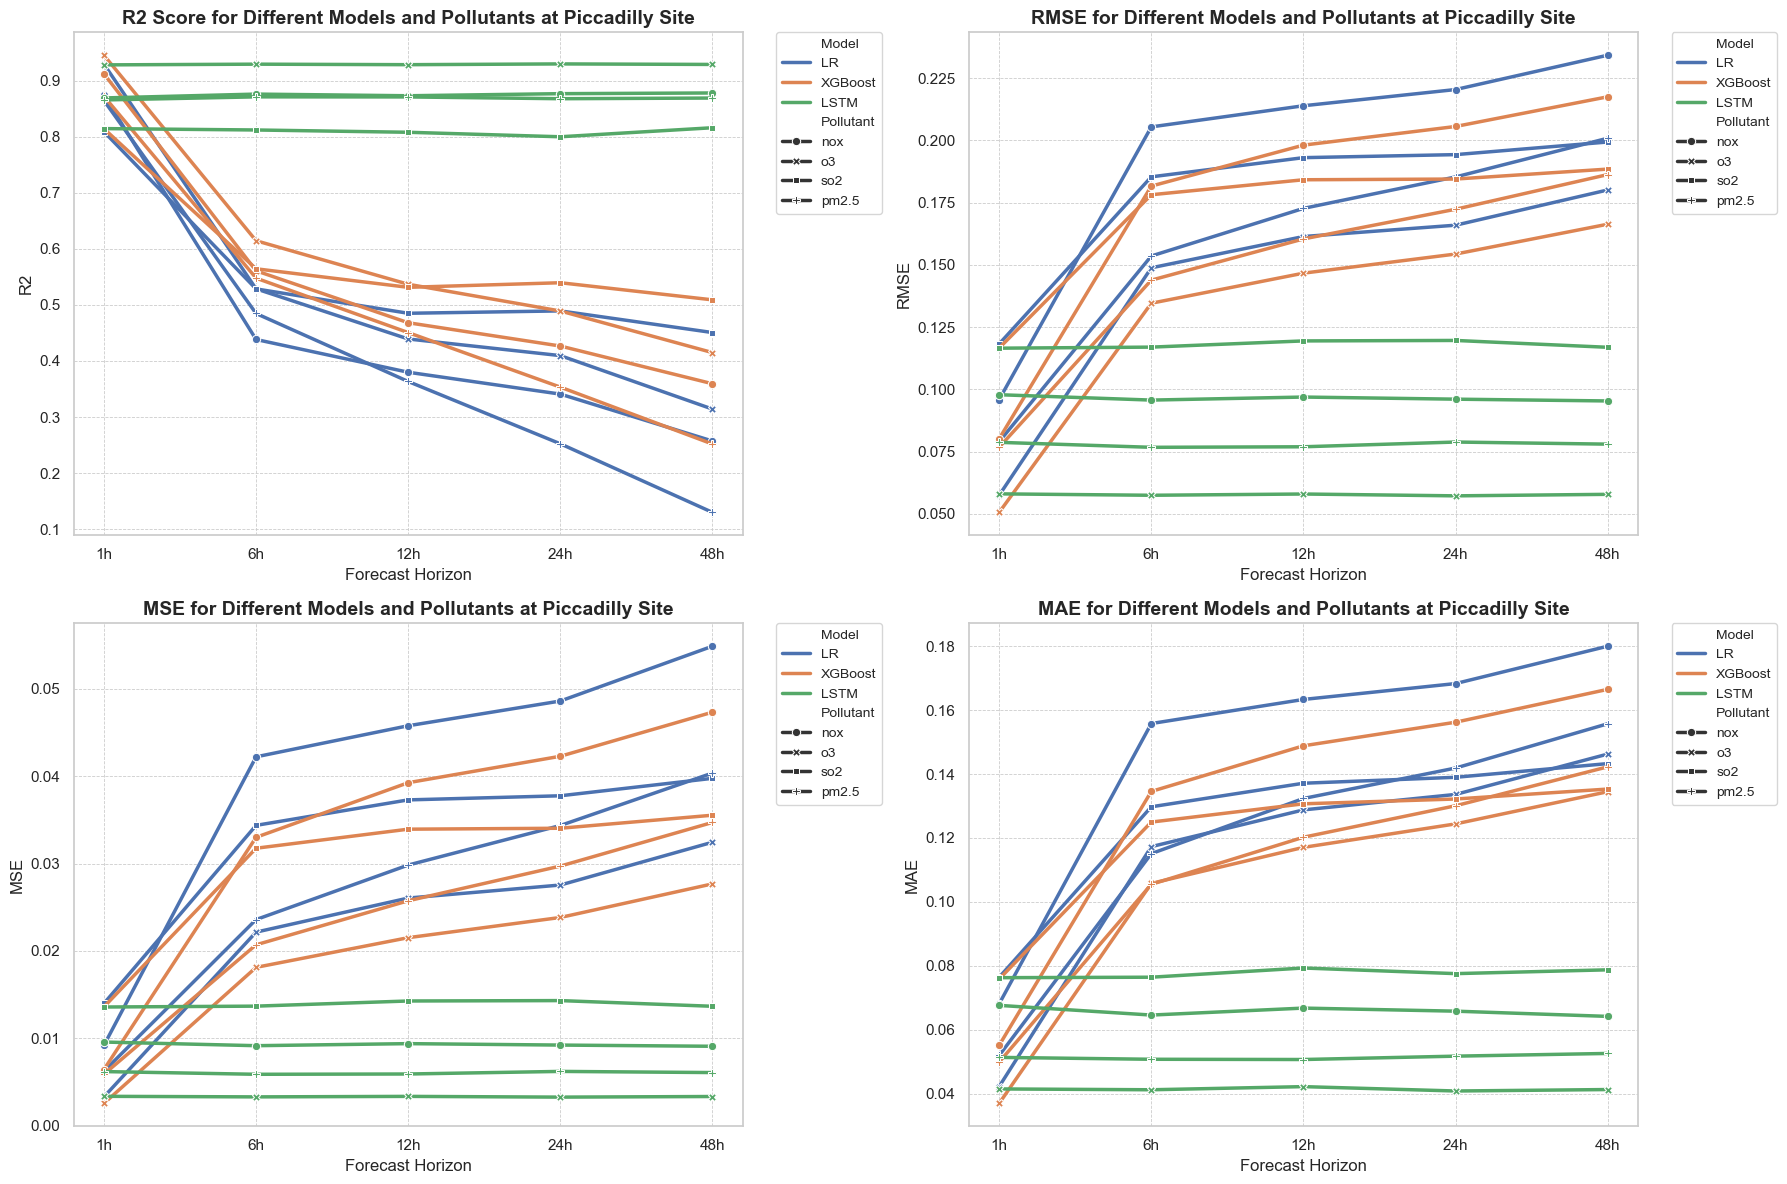

In [699]:
import matplotlib.pyplot as plt
import seaborn as sns

result_piccadilly = result[result['Site'] == 'Piccadilly']

sns.set(style="whitegrid")

def plot_metrics_improved(df, metric, title, ax):
    sns.lineplot(data=df, x='Forecast Horizon', y=metric, hue='Model', style='Pollutant', markers=True, dashes=False, linewidth=2.5, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Forecast Horizon', fontsize=12)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

plot_metrics_improved(result_piccadilly, 'R2', 'R2 Score for Different Models and Pollutants at Piccadilly Site', axes[0, 0])
plot_metrics_improved(result_piccadilly, 'RMSE', 'RMSE for Different Models and Pollutants at Piccadilly Site', axes[0, 1])
plot_metrics_improved(result_piccadilly, 'MSE', 'MSE for Different Models and Pollutants at Piccadilly Site', axes[1, 0])
plot_metrics_improved(result_piccadilly, 'MAE', 'MAE for Different Models and Pollutants at Piccadilly Site', axes[1, 1])

plt.tight_layout()
plt.show()


R2 Score:

XGBoost and LSTM models generally show higher R2 scores compared to Linear Regression (LR).
The R2 scores for all models tend to decrease as the forecast horizon increases, indicating that the models' predictive power diminishes over longer time periods.
For short-term forecasts (1h), XGBoost and LSTM perform exceptionally well across all pollutants.
RMSE:

XGBoost and LSTM models have lower RMSE values, indicating better performance compared to LR.
RMSE increases with longer forecast horizons, suggesting higher prediction errors for longer-term forecasts.
MSE:

MSE trends are similar to RMSE, with XGBoost and LSTM showing better performance, particularly for shorter forecast horizons.
The increase in MSE over longer forecast horizons highlights the increasing difficulty of accurate long-term predictions.
MAE:

XGBoost and LSTM models consistently show lower MAE values compared to LR, demonstrating better predictive accuracy.
MAE values increase with the forecast horizon, reflecting greater prediction errors over time.
Analysis and Comparison of Models:
Linear Regression (LR):

This model tends to perform less effectively compared to XGBoost and LSTM.
The performance degradation over longer forecast horizons is more pronounced.
XGBoost:

Shows strong predictive power, especially for short-term forecasts (1h, 6h).
Utilizes historical data effectively, benefiting from its ability to handle complex relationships between features.
LSTM:

Performs similarly to XGBoost, excelling in short-term predictions.
Leverages sequential historical data, which is advantageous for time-series predictions.
Modeling Process Insights:
Feature Sets:

NOx: Features include wind direction (wd), wind speed (ws), air temperature, O3, and PM2.5.
O3: Features include wind speed, air temperature, wind direction, and NOx.
SO2: Features include wind speed, air temperature, and wind direction.
PM2.5: Features include wind direction, wind speed, air temperature, and NOx.
Historical data of the predicted pollutants are also used with lag features corresponding to 24h, 36h, 48h, 72h, and 96h.
Impact of Historical Data:

Historical data provide critical context for model training, enabling better predictions by capturing temporal patterns.
Lag features help in modeling the temporal dependencies, especially for pollutants that exhibit delayed effects.
In conclusion, while all models experience a decline in performance with increasing forecast horizon, XGBoost and LSTM consistently outperform Linear Regression, making them preferable choices for pollutant concentration forecasting at the Piccadilly site. The choice of features and the inclusion of historical data play crucial roles in enhancing model accuracy.

R2 Score:

Generally, the XGBoost and LSTM models perform better across different pollutants and forecast horizons compared to the Linear Regression model.
The R2 scores tend to decrease as the forecast horizon increases, indicating reduced model performance for longer-term predictions.
RMSE:

Similar trends are observed with RMSE, where XGBoost and LSTM often show lower RMSE values (indicating better performance) compared to Linear Regression.
RMSE values increase with the forecast horizon, suggesting that predictions become less accurate as the time window extends.
MSE:

MSE follows the same pattern as RMSE, with the XGBoost and LSTM models showing better performance, especially for shorter forecast horizons.
The increase in MSE values over longer forecast horizons highlights the challenge of making accurate long-term predictions.
MAE:

Again, XGBoost and LSTM typically outperform Linear Regression in terms of MAE.
The increase in MAE values with the forecast horizon underscores the greater prediction errors encountered for longer-term forecasts.
These visualizations show that XGBoost and LSTM models generally provide more accurate predictions than Linear Regression, particularly for shorter-term forecasts. As the forecast horizon increases, all models experience a decline in performance, indicating the inherent difficulty in making accurate long-term predictions.

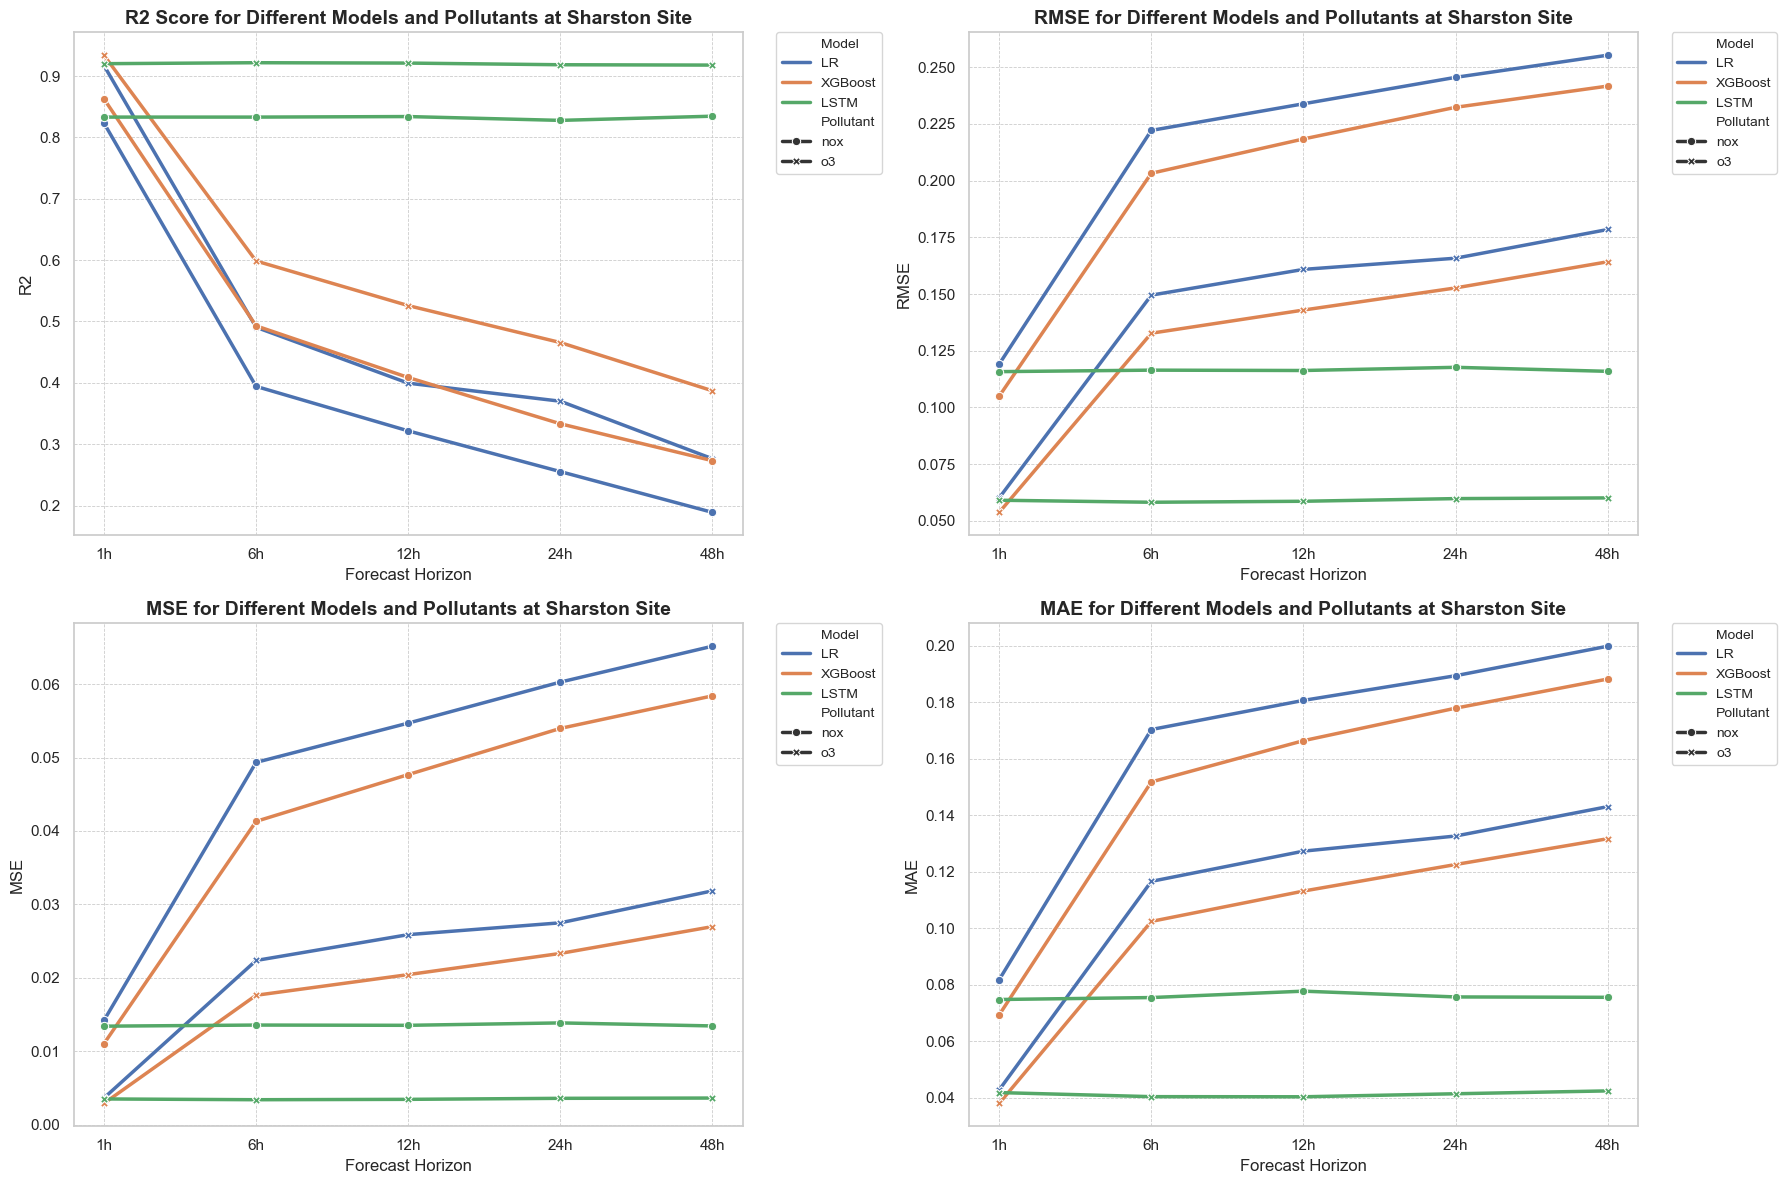

In [703]:
# Filter data for Piccadilly site
result_sharston = result[result['Site'] == 'Sharston']

# Plot settings
sns.set(style="whitegrid")

def plot_metrics_improved(df, metric, title, ax):
    sns.lineplot(data=df, x='Forecast Horizon', y=metric, hue='Model', style='Pollutant', markers=True, dashes=False, linewidth=2.5, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Forecast Horizon', fontsize=12)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

plot_metrics_improved(result_sharston, 'R2', 'R2 Score for Different Models and Pollutants at Sharston Site', axes[0, 0])
plot_metrics_improved(result_sharston, 'RMSE', 'RMSE for Different Models and Pollutants at Sharston Site', axes[0, 1])
plot_metrics_improved(result_sharston, 'MSE', 'MSE for Different Models and Pollutants at Sharston Site', axes[1, 0])
plot_metrics_improved(result_sharston, 'MAE', 'MAE for Different Models and Pollutants at Sharston Site', axes[1, 1])

plt.tight_layout()
plt.show()

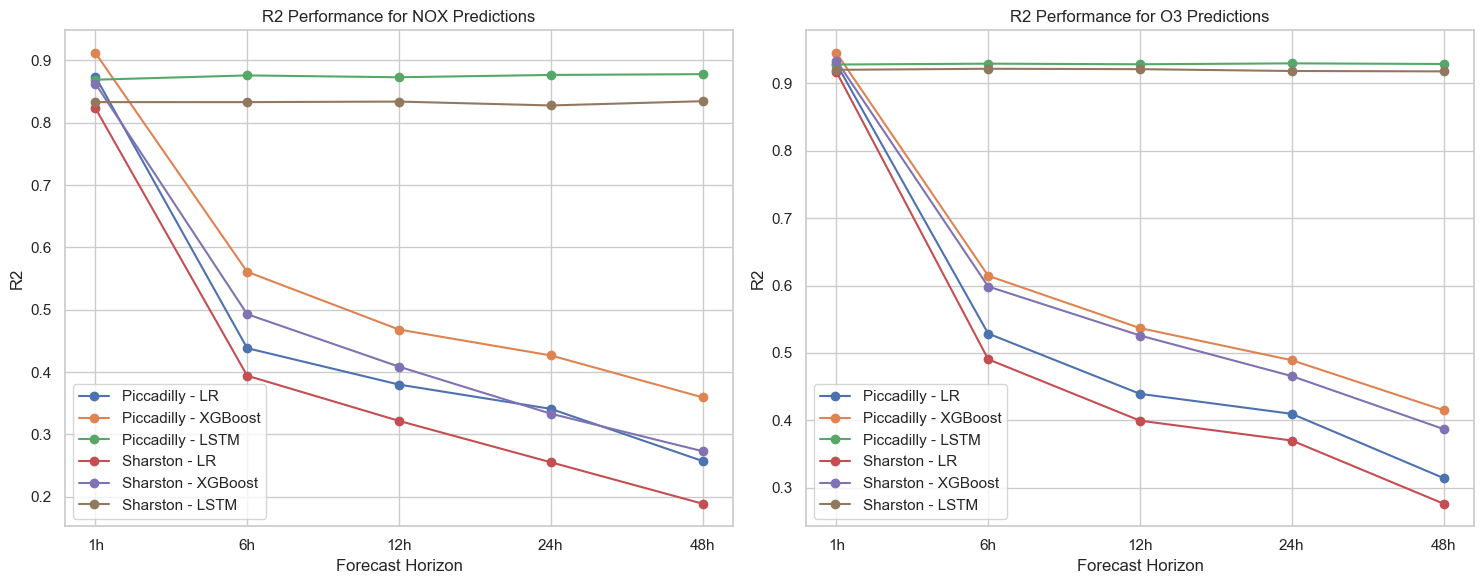

In [832]:
# Filter the data for NOX and O3
nox_df = result[result['Pollutant'] == 'nox']
o3_df = result[result['Pollutant'] == 'o3']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting NOX predictions
for site in nox_df['Site'].unique():
    for model in nox_df['Model'].unique():
        subset = nox_df[(nox_df['Site'] == site) & (nox_df['Model'] == model)]
        axes[0].plot(subset['Forecast Horizon'], subset['R2'], marker='o', label=f'{site} - {model}')

axes[0].set_title('R2 Performance for NOX Predictions')
axes[0].set_xlabel('Forecast Horizon')
axes[0].set_ylabel('R2')
axes[0].legend(loc='best')
axes[0].grid(True)

# Plotting O3 predictions
for site in o3_df['Site'].unique():
    for model in o3_df['Model'].unique():
        subset = o3_df[(o3_df['Site'] == site) & (o3_df['Model'] == model)]
        axes[1].plot(subset['Forecast Horizon'], subset['R2'], marker='o', label=f'{site} - {model}')

axes[1].set_title('R2 Performance for O3 Predictions')
axes[1].set_xlabel('Forecast Horizon')
axes[1].set_ylabel('R2')
axes[1].legend(loc='best')
axes[1].grid(True)

plt.tight_layout()
plt.show()
